# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [3]:
PATH = "/Users/yousuf/Workspace/dissertation/code/rPPG/output/hr_evaluation/"
eval_path = "/Users/yousuf/Workspace/dissertation/report/evaluation/"

# Face Tracking

In [16]:
from scipy.stats import pearsonr
pearsonr(results["Cumulative change"], results["recall"])

ValueError: array must not contain infs or NaNs

In [21]:
results

,Unnamed: 0,Video,Threshold,Frame number,Time of face tracker,Time of face detector,FN,FP,TN,TP,...,Point distance std.,Point distance original mean.,Point distance original std.,Cumulative change,recall,recall std,precision,precision std,Type,FPR
0,0,/home/yousuf/workspace/dissertation/code/rPPG/...,0.10,1,0.191989,0.138819,0,0,5897400,323400,...,NaN,NaN,NaN,NaN,1.000000,0.092958,1.000000,0.049352,Stationary,0.000000
1,1,/home/yousuf/workspace/dissertation/code/rPPG/...,0.10,2,0.020184,0.125840,49992,9552,5887848,273408,...,111.265610,222.615097,111.265610,0.095551,0.845417,0.092958,0.966243,0.049352,Stationary,0.001535
2,2,/home/yousuf/workspace/dissertation/code/rPPG/...,0.10,3,0.021883,0.107906,36384,6534,5899098,278784,...,111.529602,222.725708,111.438400,0.096068,0.884557,0.092958,0.977099,0.049352,Stationary,0.001050
3,3,/home/yousuf/workspace/dissertation/code/rPPG/...,0.10,4,0.023673,0.084571,38688,8838,5896794,276480,...,111.947464,222.902359,111.661484,0.097604,0.877246,0.092958,0.969024,0.049352,Stationary,0.001421
4,4,/home/yousuf/workspace/dissertation/code/rPPG/...,0.10,5,0.016949,0.085858,35472,8838,5900010,276480,...,112.438004,223.072174,111.952202,0.097788,0.886290,0.092958,0.969024,0.049352,Stationary,0.001421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436072,1798,/home/yousuf/workspace/dissertation/code/rPPG/...,0.45,1799,0.012997,0.067534,21738,0,6129918,69144,...,28.083164,69.180832,26.535530,0.370484,0.760811,0.092958,1.000000,0.049352,Jogging,0.000000
436073,1799,/home/yousuf/workspace/dissertation/code/rPPG/...,0.45,1800,0.014474,0.071550,21738,0,6129918,69144,...,28.219473,69.272400,26.570753,0.375634,0.760811,0.092958,1.000000,0.049352,Jogging,0.000000
436074,1800,/home/yousuf/workspace/dissertation/code/rPPG/...,0.45,1801,0.012964,0.050426,21738,0,6129918,69144,...,28.375546,69.380013,26.608917,0.381477,0.760811,0.092958,1.000000,0.049352,Jogging,0.000000
436075,1801,/home/yousuf/workspace/dissertation/code/rPPG/...,0.45,1802,0.012882,0.050512,21738,0,6129918,69144,...,28.495560,69.487007,26.611694,0.389055,0.760811,0.092958,1.000000,0.049352,Jogging,0.000000


(0.0, 1.0)

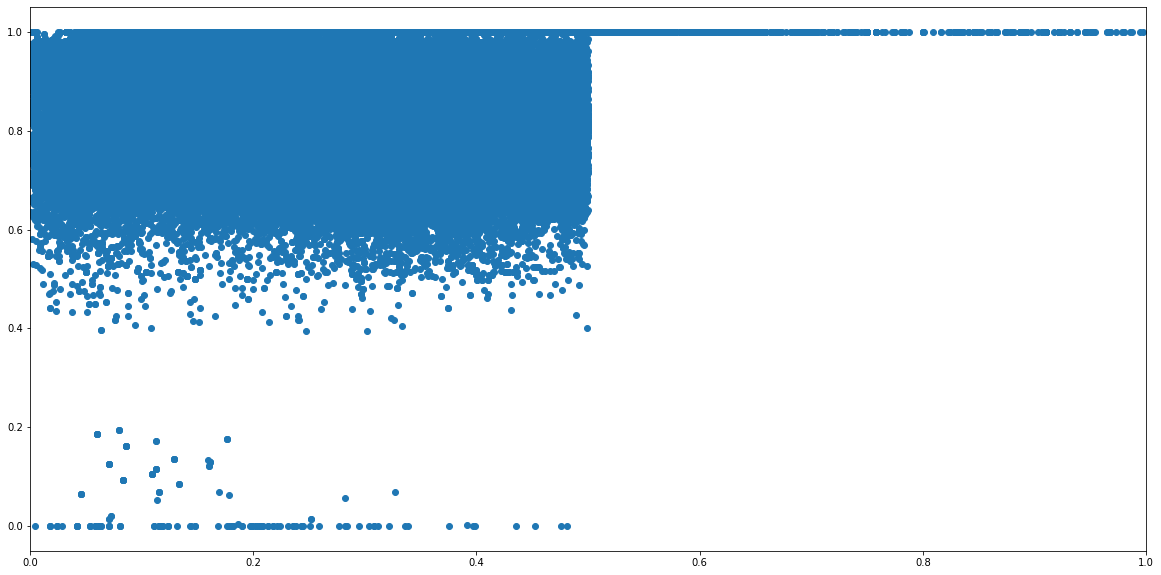

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(results["Cumulative change"], results["recall"])
ax.set_xlim(0,1)

In [17]:
# results = pd.read_csv("/Users/yousuf/Workspace/dissertation/code/rPPG/output/tracking_vs_detecting_large_scale_6.csv")
results = pd.read_csv("/Users/yousuf/Workspace/dissertation/code/rPPG/output/hr_evaluation/tracking_vs_detecting_13_04_20.csv")
results["recall"] = results["TP"]/(results["TP"]+results["FN"])
results["recall std"] = np.std(results["recall"])
results["precision"] = results["TP"]/(results["TP"]+results["FP"])
results["precision std"] = np.std(results["precision"])
results.columns

Index(['Unnamed: 0', 'Video', 'Threshold', 'Frame number',
       'Time of face tracker', 'Time of face detector', 'FN', 'FP', 'TN', 'TP',
       'Time to select points', 'Time to track points', 'Point distance mean',
       'Point distance std.', 'Point distance original mean.',
       'Point distance original std.', 'Cumulative change', 'recall',
       'recall std', 'precision', 'precision std'],
      dtype='object')

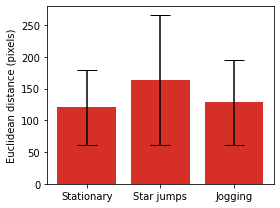

In [110]:
cats = ["Stationary", "Star jumps", "Jogging"]
means = [120.371836, 163.567757, 128.316124]
std = [59.567944, 102.780714, 66.645786]
fig, ax = plt.subplots(figsize=(4,3))
c = [1,2,3]
cmap=cm.get_cmap("RdYlGn")
ax.bar(c, means, yerr=std, capsize=10, color=cmap(0.1))
ax.set_xticks(c)
ax.set_xticklabels(cats)
ax.set_ylabel("Euclidean distance (pixels)")
plt.tight_layout()
plt.savefig(eval_path+"movement_euclidean.pgf")


In [22]:
display(results.groupby(['Type', 'Threshold']).agg(np.mean))

Unnamed: 0  Frame number  Time of face tracker  \
Type       Threshold                                                   
Jogging    0.10       906.454028    907.454028              0.044322   
           0.15       906.454028    907.454028              0.031349   
           0.20       906.454028    907.454028              0.022603   
           0.25       906.454028    907.454028              0.018666   
           0.30       906.454028    907.454028              0.017087   
           0.35       906.454028    907.454028              0.015925   
           0.40       906.454028    907.454028              0.015810   
           0.45       906.454028    907.454028              0.015790   
           0.50       906.454028    907.454028              0.015293   
Star jumps 0.10       877.491462    878.491462              0.042095   
           0.15       877.491462    878.491462              0.032165   
           0.20       877.491462    878.491462              0.024925   
           0.25       877.491462    878.491462              0.020730   
           0.30       877.491462    878.491462              0.018819   
           0.35       877.491462    878.491462              0.017483   
           0.40       877.491462    878.491462              0.017254   
           0.45       877.491462    878.491462              0.017190   
           0.50       877.491462    878.491462              0.016396   
Stationary 0.10       909.236947    910.236947              0.039512   
           0.15       909.236947    910.236947              0.032458   
           0.20       909.236947    910.236947              0.022500   
           0.25       909.236947    910.236947              0.016878   
           0.30       909.236947    910.236947              0.014681   
           0.35       909.236947    910.236947              0.013897   
           0.40       909.236947    910.236947              0.013957   
           0.45       909.236947    910.236947              0.014256   
           0.50       909.236947    910.236947              0.013771   

                      Time of face detector            FN            FP  \
Type       Threshold                                                      
Jogging    0.10                    0.063152  10026.437550   3557.086309   
           0.15                    0.063021  16049.574763   4940.577703   
           0.20                    0.058137  19802.311975   5577.413476   
           0.25                    0.055972  21835.097090   6108.347320   
           0.30                    0.054829  23023.938377   6280.606493   
           0.35                    0.052965  23251.788790   6617.720490   
           0.40                    0.053576  23642.954058   7369.697090   
           0.45                    0.054604  25175.946891   7090.336172   
           0.50                    0.053573  24805.385972   7441.587198   
Star jumps 0.10                    0.063036  11546.014664   4364.886307   
           0.15                    0.063149  16247.800990   6268.419539   
           0.20                    0.060136  18899.028566   8247.304133   
           0.25                    0.056835  21173.629594   8518.752428   
           0.30                    0.055366  22303.783279   9158.006285   
           0.35                    0.053570  22915.921729  10492.500286   
           0.40                    0.054262  23477.852409  11616.770710   
           0.45                    0.055029  23190.232908  12493.770139   
           0.50                    0.053575  23082.539897  13751.605789   
Stationary 0.10                    0.065555  12372.353771   2558.605374   
           0.15                    0.063444  17076.396092   3147.145099   
           0.20                    0.059586  20642.461374   3972.907237   
           0.25                    0.056871  24041.452947   3801.767084   
           0.30                    0.054792  25013.355664   3799.087328   
           0.35                    0.052819  24797.788397 

In [6]:
np.sum(np.bitwise_and(results["FN"] == 0, results["FP"] == 0))

9086

In [7]:
print(f"Total computation time: {np.sum(results['Time of face detector']) + np.sum(results['Time of face tracker'])}s")

Total computation time: 27815.37788414955s


In [19]:
# results["Type"] = ["Stationary" if s.endswith(".avi") else "Jogging" if s.endswith("mov-2.mp4") else "Star jumps" for s in results["Video"]]
results["Type"] = ["Stationary" if "stat" in s else "Jogging" if "jog" in s else "Star jumps" for s in results["Video"]]
results["FPR"] = results["FP"]/(results["FP"] + results["FN"] + results["TP"] + results["TN"])

In [31]:
temp = results.groupby(['Type', 'Threshold']).agg({"recall":np.mean,"FPR":np.mean})
# display(temp)
temp.columns = ["recall", "FPR"]
temp.index
types = ["Stationary", "Star jumps", "Jogging"]
thresholds = [0.1,0.125,0.15,0.175,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
cols = []
for t in types:
    x,y = temp.loc[t]["recall"].values, temp.loc[t]["FPR"].values
    x = np.append(x,np.append(x,x))
    y = np.append(y,np.append(y,y))
    temp[f"{t}-recall"] = x
    temp[f"{t}-FPR"] = y
    cols.append(f"{t}-recall")
    cols.append(f"{t}-FPR")
# temp[:11]
print(temp[:9][cols].to_latex())

\begin{tabular}{llrrrrrr}
\toprule
        &      &  Stationary-recall &  Stationary-FPR &  Star jumps-recall &  Star jumps-FPR &  Jogging-recall &  Jogging-FPR \\
Type & Threshold &                    &                 &                    &                 &                 &              \\
\midrule
Jogging & 0.10 &           0.938756 &        0.000411 &           0.934786 &        0.000702 &        0.948687 &     0.000572 \\
        & 0.15 &           0.911294 &        0.000506 &           0.902089 &        0.001008 &        0.907298 &     0.000794 \\
        & 0.20 &           0.873086 &        0.000639 &           0.878286 &        0.001326 &        0.877068 &     0.000897 \\
        & 0.25 &           0.838909 &        0.000611 &           0.860806 &        0.001369 &        0.859240 &     0.000982 \\
        & 0.30 &           0.829122 &        0.000611 &           0.852494 &        0.001472 &        0.850538 &     0.001010 \\
        & 0.35 &           0.825344 &        0.0007

In [65]:
    
temp = results.groupby(by=["Video", "Type", "Threshold"]).agg({"Time to select points":[lambda x: np.sum(~np.isnan(x)), np.mean], "Time to track points":[np.mean, len], "Time of face detector":[np.mean, np.std], "Time of face tracker":[np.mean, np.std]})
temp.columns = ["Redetections", "Selecting pixels","Tracking pixels", "Total frames", "Face detector mean", "Face detector std", "Tracker mean", "Tracker std"]
# display(temp)
# performance = results.groupby(by=["Type", "Threshold"]).agg({"Total frames":np.sum, "Redetections":[np.mean], "Face detector std":[lambda x: x],"Face detector mean":[np.mean, np.std], "Tracker mean":[np.mean, np.std], "Selecting pixels":[np.mean,np.std], "Tracking pixels":[np.mean, np.std]})
performance = results.groupby(by=["Type", "Threshold"]).agg({"Time to select points":[lambda x: np.sum(~np.isnan(x)), np.mean, np.std], "Time to track points":[np.mean, np.std, len], "Time of face detector":[np.mean, np.std], "Time of face tracker":[np.mean, np.std]})
performance.columns = performance.columns.droplevel(0)
performance.columns = ["Redections", "Selecting mean", "Selecting std","Tracking mean", "Tracking std", "Total frames", "Detector mean", "Detector std", "Tracker mean", "Tracker std"]
# performance.columns = ["Total frames", "Redetections mean", "Redetections std", "Detector mean", "Detector std", "Tracker mean", "Tracker std", "Selecting mean", "Selecting std", "Tracking mean", "Tracking std"]
# performance["Redetection rate"] = performance["Detector mean"]/performance["Total frames"]
performance["Redetection rate"] = performance["Redections"]/performance["Total frames"]
performance["Redetection rate std"] = performance["Detector std"]/performance["Total frames"]
# performance["Redetection limit"] = (performance["Detector mean"]-performance["Tracker mean"])/(performance["Detector mean"]+performance["Selecting mean"])
performance["Redetection limit"] = (performance["Detector mean"]-performance["Tracking mean"])/(performance["Detector mean"]+performance["Selecting mean"])
performance["redection lower limit"] = (performance["Detector mean"]-performance["Tracking mean"]-performance["Detector std"]-performance["Tracking std"])/(performance["Detector mean"]+performance["Selecting mean"]+performance["Detector std"] + performance["Selecting std"])
performance["redection upper limit"] = (performance["Detector mean"]-performance["Tracking mean"]+performance["Detector std"]+performance["Tracking std"])/(performance["Detector mean"]+performance["Selecting mean"]-performance["Detector std"] - performance["Selecting std"])
performance["Redection limit std"] = performance["redection upper limit"]-performance["redection lower limit"]
performance

Redections  Selecting mean  Selecting std  \
Type       Threshold                                              
Jogging    0.10           8797.0        0.003254       0.000141   
           0.15           4769.0        0.003263       0.000158   
           0.20           2619.0        0.003033       0.000298   
           0.25           1502.0        0.002924       0.000288   
           0.30           1081.0        0.002884       0.000272   
           0.35            862.0        0.002839       0.000237   
           0.40            740.0        0.002861       0.000252   
           0.45            635.0        0.002923       0.000298   
           0.50            569.0        0.002874       0.000272   
Star jumps 0.10           7815.0        0.003271       0.000166   
           0.15           4827.0        0.003277       0.000171   
           0.20           3011.0        0.003145       0.000297   
           0.25           2009.0        0.003035       0.000321   
           0.30           1563.0        0.002945       0.000296   
           0.35           1307.0        0.002932       0.000246   
           0.40           1133.0        0.002907       0.000278   
           0.45           1031.0        0.002962       0.000286   
           0.50            935.0        0.002875       0.000262   
Stationary 0.10           7155.0        0.003244       0.000138   
           0.15           5086.0        0.003245       0.000146   
           0.20           2433.0        0.003066       0.000298   
           0.25            788.0        0.002997       0.000289   
           0.30            221.0        0.002948       0.000314   
           0.35            144.0        0.002797       0.000192   
           0.40            107.0        0.002876       0.000269   
           0.45             90.0        0.002880       0.000276   
           0.50             77.0        0.002857       0.000313   

                      Tracking mean  Tracking std  Total frames  \
Type       Threshold                                              
Jogging    0.10            0.000606      0.000287       16325.0   
           0.15            0.000602      0.000250       16325.0   
           0.20            0.000556      0.000226       16325.0   
           0.25            0.000539      0.000223       16325.0   
           0.30            0.000533      0.000258       16325.0   
           0.35            0.000513      0.000208       16325.0   
           0.40            0.000518      0.000224       16325.0   
           0.45            0.000533      0.000307       16325.0   
           0.50            0.000528      0.000335       16325.0   
Star jumps 0.10            0.000622      0.000273       15753.0   
           0.15            0.000617      0.000195       15753.0   
           0.20            0.000603      0.000373       15753.0   
           0.25            0.000563      0.000230       15753.0   
           0.30            0.000553      0.000253       15753.0   
           0.35            0.000536      0.000260       15753.0   
           0.40            0.000544      0.000258       15753.0   
           0.45            0.000549      0.000256       15753.0   
           0.50            0.000533      0.000255       15753.0   
Stationary 0.10            0.000656      0.000761       16375.0   
           0.15            0.000584      0.000375       16375.0   
           0.20            0.000542      0.000260       16375.0   
           0.25            0.000520      0.000245       16375.0   
           0.30            0.000498      0.000190       16375.0   
           0.35            0.000486      0.000230       16375.0   
           0.40            0.000490      0.000245       16375.0   
           0.45            0.000498      0.000200       16375.0   
           0.50            0.000489      0.000264       16375.0   

                      Detector mean  Detector std  Tracker mean  Tracker std  \
Type       Threshold                                  

[[0.057100122155730654, 0.056647596487448056, 0.057217764013776824], [0.014681038994825523, 0.017087063621415842, 0.018819105554775745], [0.013956982634449734, 0.01580950842151963, 0.017254209712158117], [0.013771382717685845, 0.015292723598743107, 0.016396039055769977]]


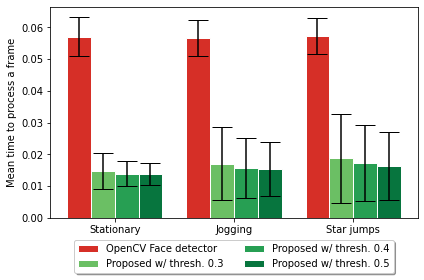

In [75]:
# y = performance["Time of face tracker"]
# yerr = performance["Tracker std"]
import tikzplotlib 
status = ["Stationary", "Jogging", "Star jumps"]
# thresholds = [0.1, 0.125, 0.15, 0.175, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
thresholds = [0.3, 0.4, 0.5]

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
 
# set width of bar
barWidth = 0.2
 
# set height of bar
# an array of the heights for each threshold, first element is face detector
# bar_heights = 
# bars1 = 
# bars2 = [28, 6, 16, 5, 10]
# bars3 = [29, 3, 24, 25, 17]
bar_heights = []
bar_errors = []

det_h = []
det_err = []
for s in status:
    relevant = performance.loc[s]
    det_mean, det_std = np.mean(relevant["Detector mean"]), np.mean(relevant["Detector std"])
    det_h.append(det_mean)
    det_err.append(det_std)
    
bar_heights.append(det_h)
bar_errors.append(det_err)
    
for t in thresholds: 
    group_heights = []
    group_errors = []
    for s in status:
        rel = performance.loc[s,t]
        group_heights.append(rel["Tracker mean"])
        group_errors.append(rel["Tracker std"])
    bar_heights.append(group_heights)
    bar_errors.append(group_errors)

cmap = cm.get_cmap('RdYlGn')
fig, ax = plt.subplots(figsize=(6,4))
# r1 = np.arange(len(bars1))
# r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
for i, group in enumerate(bar_heights):
    r = np.arange(len(group))
    r = [x + (i*barWidth) for x in r]
#     c = "r" if i == 0 else "b"
    c = cmap(0.1) if i == 0 else cmap(0.7 + (0.09*i))
    l = "OpenCV Face detector" if i == 0 else f"Proposed w/ thresh. {thresholds[i-1]}"
    ax.bar(r, group, yerr=bar_errors[i], width=barWidth, color=c, label=l, edgecolor='white', capsize=10)
 
# Make the plot
# plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
# plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
# plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
# ax.xlabel('group', fontweight='bold')
plt.xticks([r + (1.5*barWidth) for r in range(len(thresholds))], status)
ax.set_ylabel("Mean time to process a frame")
print(bar_heights)
 
# Create legend & Show graphic
# ax.legend()
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08),
          fancybox=True, shadow=True, ncol=2)
# tikzplotlib.save(eval_path+"tracking_time.tex")
plt.tight_layout()
plt.savefig(eval_path+"tracking_time.pgf")
plt.show()

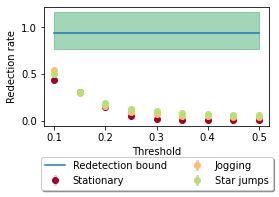

In [74]:
fig, ax = plt.subplots(figsize=(4,3))

thresholds=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
for i, s in enumerate(status):
    rel = performance.loc[s]
#     ax.scatter(rel.index, rel["Redetection rate"], yerr = rel["Redetection rate std"], label=s)
#     for t in thresholds:
#         rel = performance.loc[s,t]
#         print(rel.index)
#         display(rel)
    ax.errorbar(rel.index.values, rel["Redetection rate"], yerr=rel["Redetection rate std"], fmt='o', color=cmap(i/3), ecolor='lightgray', elinewidth=3, capsize=1, label=s)

up = np.mean(performance["redection upper limit"])
low = np.mean(performance["redection lower limit"])
y = np.mean(performance["Redetection limit"])
fill = cm.get_cmap("RdYlGn")
ax.fill_between(thresholds, low, up, color=fill(0.9), alpha=0.4)
ax.plot(thresholds, np.mean(performance["Redetection limit"])*np.ones(len(thresholds)), label="Redetection bound")
ax.set_xlabel("Threshold")
ax.set_ylabel("Redection rate")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.22),
          fancybox=True, shadow=True, ncol=2)
plt.tight_layout()
plt.savefig(eval_path+"redect.pgf")


#### Cumulative size change

Video: /home/yousuf/workspace/dissertation/code/rPPG/experiments/yousuf-re-run/1_jog_2.mp4 at threshold: 0.1


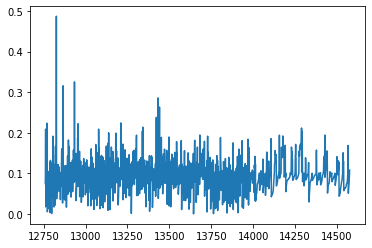

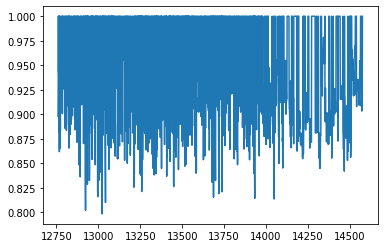

(0.5596561828757263, 3.31557968795024e-150)


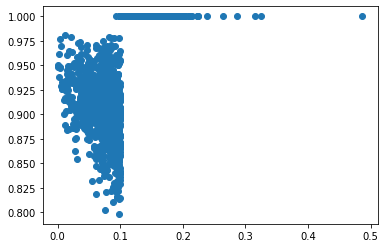

1816


In [102]:
videos = results["Video"].unique()
thresholds = [0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.45, 0.5]
for v in videos[7:8]:
    for t in thresholds[0:1]:
        print(f"Video: {v} at threshold: {t}")
        rel = results.loc[(results["Video"]==v)&(results["Threshold"]==t)&(~np.isnan(results["Cumulative change"]))]
        plt.plot(rel["Cumulative change"])
        plt.show()
        plt.plot(rel["recall"])
        plt.show()
        print(pearsonr(rel["Cumulative change"], rel["recall"]))
        plt.scatter(rel["Cumulative change"], rel["recall"])
        plt.show()
#     plt.plot(results.loc[results["Video"]==v]["Cumulative change"])
print(len(rel))
# plt.scatter(rel)

In [8]:
accuracy = results.groupby(["Type", "Threshold"]).agg({"FPR":[np.mean, np.std], "recall":[np.mean,np.std]})
accuracy.columns = accuracy.columns.droplevel(0)
accuracy.columns = ["FPR mean", "FPR std", "recall mean", "recall std"]
accuracy

FPR mean   FPR std  recall mean  recall std
Type       Threshold                                             
Jogging    0.100      0.000384  0.001867     0.949240    0.096562
           0.125      0.000507  0.001976     0.928708    0.108785
           0.150      0.000868  0.003009     0.909149    0.110300
           0.175      0.000742  0.002695     0.894600    0.113322
           0.200      0.002099  0.009571     0.871856    0.112843
           0.250      0.001295  0.004259     0.846058    0.109995
           0.300      0.001196  0.003135     0.824485    0.112366
           0.350      0.001551  0.003483     0.816987    0.111709
           0.400      0.001676  0.004160     0.798890    0.117448
           0.450      0.001595  0.002787     0.800861    0.115158
           0.500      0.003307  0.011165     0.783104    0.122086
Star jumps 0.100      0.002220  0.003301     0.948175    0.038206
           0.125      0.002673  0.003749     0.943530    0.040278
           0.150      0.003175  0.004570     0.938508    0.042121
           0.175      0.002992  0.004014     0.936067    0.043869
           0.200      0.003432  0.004338     0.936017    0.042620
           0.250      0.004346  0.005770     0.937609    0.043854
           0.300      0.005084  0.007158     0.934811    0.045905
           0.350      0.005788  0.008305     0.932703    0.044202
           0.400      0.007110  0.009444     0.936631    0.045685
           0.450      0.007136  0.009821     0.932281    0.045582
           0.500      0.008250  0.011764     0.927878    0.052252
Stationary 0.100      0.000766  0.001034     0.931237    0.024992
           0.125      0.000764  0.001054     0.925882    0.024775
           0.150      0.000682  0.001049     0.921940    0.028721
           0.175      0.000696  0.001095     0.920470    0.029014
           0.200      0.000826  0.001227     0.919102    0.029335
           0.250      0.000775  0.001209     0.921081    0.031240
           0.300      0.000728  0.001101     0.916228    0.030460
           0.350      0.000648  0.001208     0.911905    0.034816
           0.400      0.000866  0.001269     0.918874    0.032957
           0.450      0.000810  0.001326     0.918034    0.035514
           0.500      0.001041  0.001516     0.916427    0.039594

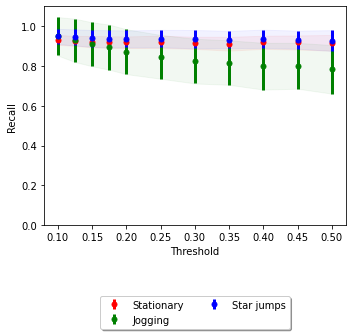

In [163]:
# fig, ax = plt.subplots(figsize=(6,4))
# ax.scatter(results["recall"], results["precision"])
# for t in ["Stationary", "Jogging", "Star jumps"]:
#     rel = accuracy.loc[t]
#     ax.plot(rel["FPR"]["mean"], rel["recall"]["mean"])
    
    
# y = performance["Time of face tracker"]
# yerr = performance["Tracker std"]
import tikzplotlib 
status = ["Stationary", "Jogging", "Star jumps"]
thresholds = [0.1, 0.125, 0.15, 0.175, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
# thresholds = [0.3, 0.4, 0.5]

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
 
# set width of bar
barWidth = 0.2
 
# set height of bar
# an array of the heights for each threshold, first element is face detector
# bar_heights = 
# bars1 = 
# bars2 = [28, 6, 16, 5, 10]
# bars3 = [29, 3, 24, 25, 17]
bar_heights = []
bar_errors = []

# det_h = []
# det_err = []
# for s in status:
#     relevant = accuracy.loc[s]
#     det_mean, det_std = np.mean(relevant["recall mean"]), np.mean(relevant["recall std"])
#     det_h.append(det_mean)
#     det_err.append(det_std)
    
# bar_heights.append(det_h)
# bar_errors.append(det_err)
    
for t in thresholds: 
    group_heights = []
    group_errors = []
    for s in status:
        rel = accuracy.loc[s,t]
        group_heights.append(rel["recall mean"])
        group_errors.append(rel["recall std"])
    bar_heights.append(group_heights)
    bar_errors.append(group_errors)

cmap = cm.get_cmap('gnuplot')
fig, ax = plt.subplots(figsize=(5,5))
# r1 = np.arange(len(bars1))
# r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
for i, group in enumerate(bar_heights):
    r = np.arange(len(group))
    r = [x + (i*barWidth) for x in r]
#     c = "r" if i == 0 else "b"
    c = cmap(0.1) if i == 0 else cmap(0.7 + (0.09*i))
    l = "OpenCV Face detector" if i == 0 else f"Proposed w/ thresh. {thresholds[i-1]}"
#     ax.bar(r, group, yerr=bar_errors[i], width=barWidth, color=c, label=l, edgecolor='white', capsize=10)
#     ax.errorbar(r, group, yerr=bar_errors[i],label=str(i), color=c, capsize=10)
cs = ["r","g","b"] 
for i, s in enumerate(status):
    rel = accuracy.loc[s]
#     ax.scatter(rel.index, rel["Redetection rate"], yerr = rel["Redetection rate std"], label=s)
#     for t in thresholds:
#         rel = performance.loc[s,t]
#     ax.errorbar(rel.index, rel["Redetection rate"], yerr=rel["Redetection rate std"], fmt='o', color=cmap(i/3), ecolor='lightgray', elinewidth=3, capsize=1, label=s)
#     ax.errorbar(rel.index, rel["recall mean"], yerr=rel["recall std"], fmt='o', color=cmap(i/3), ecolor=cmap(i/3), elinewidth=3, capsize=0, label=s, markersize=5)
    ax.errorbar(rel.index, rel["recall mean"], yerr=rel["recall std"], fmt='o', color=cs[i], ecolor=cs[i], elinewidth=3, capsize=0, label=s, markersize=5)
#     ax.fill_between(rel.index, rel["recall mean"]-rel["recall std"], rel["recall mean"]+rel["recall std"], alpha=0.05, color=cmap(i/3))
    ax.fill_between(rel.index, rel["recall mean"]-rel["recall std"], rel["recall mean"]+rel["recall std"], alpha=0.05, color=cs[i])
# Make the plot
# plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
# plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
# plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
# ax.xlabel('group', fontweight='bold')
# plt.xticks([r + (4*barWidth) for r in range(len(thresholds))], status)
ax.set_ylabel("Recall")
ax.set_xlabel("Threshold")
ax.set_ylim(0,1.1)
# Create legend & Show graphic
# ax.legend()
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=2)
# tikzplotlib.save(eval_path+"tracking_time.tex")
plt.tight_layout()
plt.savefig(eval_path+"recall.pgf")
plt.show()

Index(['Unnamed: 0', 'Video', 'Threshold', 'Frame number',
       'Time of face tracker', 'Time of face detector', 'FN', 'FP', 'TN', 'TP',
       'Time to select points', 'Time to track points', 'Point distance mean',
       'Point distance std.', 'recall', 'recall std', 'precision',
       'precision std', 'Type', 'FPR'],
      dtype='object')

In [328]:
results.groupby(by=["Type", "Threshold"]).agg(np.mean)

Unnamed: 0  Frame number  Time of face tracker  \
Type       Threshold                                                    
Jogging    0.100       550.000000    551.000000              0.055166   
           0.125       550.000000    551.000000              0.049828   
           0.150       550.000000    551.000000              0.042877   
           0.175       550.000000    551.000000              0.039102   
           0.200       550.000000    551.000000              0.033435   
           0.250       550.000000    551.000000              0.028238   
           0.300       550.000000    551.000000              0.024668   
           0.350       550.000000    551.000000              0.022662   
           0.400       550.000000    551.000000              0.022046   
           0.450       550.000000    551.000000              0.021434   
           0.500       550.000000    551.000000              0.020812   
Star jumps 0.100       745.995329    746.995329              0.027890   
           0.125       745.995329    746.995329              0.025953   
           0.150       745.995329    746.995329              0.024387   
           0.175       745.995329    746.995329              0.023413   
           0.200       745.995329    746.995329              0.022697   
           0.250       745.995329    746.995329              0.021538   
           0.300       745.995329    746.995329              0.020990   
           0.350       745.995329    746.995329              0.020428   
           0.400       745.995329    746.995329              0.020051   
           0.450       745.995329    746.995329              0.019834   
           0.500       745.995329    746.995329              0.019743   
Stationary 0.100      3138.012508   3139.012508              0.009537   
           0.125      3138.012508   3139.012508              0.007898   
           0.150      3138.012508   3139.012508              0.007320   
           0.175      3138.012508   3139.012508              0.007173   
           0.200      3138.012508   3139.012508              0.007118   
           0.250      3138.012508   3139.012508              0.007067   
           0.300      3138.012508   3139.012508              0.007040   
           0.350      3138.012508   3139.012508              0.007072   
           0.400      3138.012508   3139.012508              0.007039   
           0.450      3138.012508   3139.012508              0.007018   
           0.500      3138.012508   3139.012508              0.007031   

                      Time of face detector            FN            FP  \
Type       Threshold                                                      
Jogging    0.100                   0.065819   5997.155313   2388.425068   
           0.125                   0.066341   8302.198910   3151.975477   
           0.150                   0.066360  10477.825613   5396.645777   
           0.175                   0.066210  12082.967302   4612.983651   
           0.200                   0.066260  14607.095368  13055.713896   
           0.250                   0.066548  17509.359673   8055.967302   
           0.300                   0.066277  19858.337875   7440.599455   
           0.350                   0.066164  20673.991826   9648.103542   
           0.400                   0.066197  22618.021798  10424.934605   
           0.450                   0.065892  22267.051771   9923.610354   
           0.500                   0.065788  24356.168937  20573.588556   
Star jumps 0.100                   0.065955  35884.361783  13808.909554   
           0.125                   0.066241  38891.814013  16626.200000   
           0.150                   0.066306  42469.952866  19751.244586   
           0.175                   0.065927  43759.435669  18611.165605   
           0.200                   0.066322  43782.768153  21349.249682   
           0.250                   0.066125  42701.540127  27036.808917   
           0.300                   0.06596

## Threshold

In [13]:
prec = results.groupby(by=["Video","Threshold"]).agg({"recall":[np.mean, np.std], "precision":[np.mean, np.std]})
prec.index

MultiIndex([('mahnob/21/P1-Rec1-2009.07.09.17.53.46_C1 trigger _C_Section_21.avi', ...),
            ('mahnob/21/P1-Rec1-2009.07.09.17.53.46_C1 trigger _C_Section_21.avi', ...),
            ('mahnob/21/P1-Rec1-2009.07.09.17.53.46_C1 trigger _C_Section_21.avi', ...),
            ('mahnob/21/P1-Rec1-2009.07.09.17.53.46_C1 trigger _C_Section_21.avi', ...),
            ('mahnob/21/P1-Rec1-2009.07.09.17.53.46_C1 trigger _C_Section_21.avi', ...),
            ('mahnob/21/P1-Rec1-2009.07.09.17.53.46_C1 trigger _C_Section_21.avi', ...),
            ('mahnob/21/P1-Rec1-2009.07.09.17.53.46_C1 trigger _C_Section_21.avi', ...),
            ('mahnob/21/P1-Rec1-2009.07.09.17.53.46_C1 trigger _C_Section_21.avi', ...),
            ('mahnob/21/P1-Rec1-2009.07.09.17.53.46_C1 trigger _C_Section_21.avi', ...),
            ('mahnob/21/P1-Rec1-2009.07.09.17.53.46_C1 trigger _C_Section_21.avi', ...),
            ...
            (                              'test-face-detection-videos/mov-3.mp4', ...),
     

In [14]:
movement = [c for c in prec.index[0,:] if c.startswith("test-face-detection-videos/mov")]
movement

IndexError: too many indices for array

In [1]:
fig, ax = plt.subplots(figsize=(15,10))
cmap = cm.get_cmap('Pastel1')
ax.bar(np.arange(len(prec)), prec["precision"]["mean"], yerr=prec["precision"]["std"], capsize=10, color=cmap(0.1))
ax.set_xticklabels(prec.index)
ax.set_ylim((0.93, 1.0))

NameError: name 'plt' is not defined

In [80]:
prec

recall           precision          
               mean       std      mean       std
Threshold                                        
0.100      0.932799  0.030836  0.991951  0.014990
0.125      0.927050  0.031886  0.991505  0.016804
0.150      0.922592  0.035083  0.991479  0.021287
0.175      0.920686  0.035887  0.991574  0.019167
0.200      0.918783  0.036644  0.989569  0.027997
0.250      0.919938  0.039138  0.989594  0.026521
0.300      0.914730  0.039979  0.989604  0.026401
0.350      0.910453  0.043196  0.989504  0.030357
0.400      0.916513  0.044065  0.987042  0.033584
0.450      0.915538  0.045369  0.987478  0.033045
0.500      0.913293  0.050329  0.984484  0.042719

# Region Selection

In [18]:
ppg_meta = pd.read_csv(PATH + "ppg_meta_2.csv")
print(ppg_meta.columns)
str_cols = ["Video file", "rPPG file", "PPG file", "ECG file", "Tracker", "Region selector"]
num_cols = [c for c in ppg_meta.columns if c not in str_cols]
for c in num_cols:
    ppg_meta[c] = pd.to_numeric(ppg_meta[c], errors='coerce')
ppg_meta["FPS"] = ppg_meta["Number of frames"]/ppg_meta["Total time"]

Index(['Video file', 'rPPG file', 'PPG file', 'ECG file', 'Framerate',
       'Tracker', 'Region selector', 'Time mean', 'Time std',
       'Number of frames', 'Total time', 'Noise'],
      dtype='object')


In [19]:
ppg_meta.groupby(by=["Video file", "Tracker", "Region selector"]).agg({"Total time":np.mean, "FPS":np.mean})


Total time  \
Video file                                         Tracker                               Region selector                                
/Users/yousuf/Workspace/dissertation/code/rPPG/... KLTBoxingWithThresholding-DNNDetector BayesianSkinDetector-thresholded   34.394926   
                                                                                         BayesianSkinDetector-weighted      35.088652   
                                                                                         IntervalSkinDetector               30.606746   
                                                                                         PrimitiveROI                       30.291843   
                                                   RepeatedDetector-DNNDetector          BayesianSkinDetector-thresholded   54.841375   
...                                                                                                                               ...   
/Users/yousuf/Workspace/dissertation/code/rPPG/... RepeatedDetector-DNNDetector          BayesianSkinDetector-thresholded  169.152513   
                                                                                         BayesianSkinDetector-weighted     164.868128   
                                                                                         IntervalSkinDetector              151.663928   
                                                                                         PrimitiveROI                      189.766951   
Video file                                         Tracker                               Region selector                          NaN   

                                                                                                                                 FPS  
Video file                                         Tracker                               Region selector                              
/Users/yousuf/Workspace/dissertation/code/rPPG/... KLTBoxingWithThresholding-DNNDetector BayesianSkinDetector-thresholded  52.827560  
                                                                                         BayesianSkinDetector-weighted     51.783124  
                                                                                         IntervalSkinDetector              59.365997  
                                                                                         PrimitiveROI                      59.983145  
                                                   RepeatedDetector-DNNDetector          BayesianSkinDetector-thresholded  33.131919  
...                                                                                                                              ...  
/Users/yousuf/Workspace/dissertation/code/rPPG/... RepeatedDetector-DNNDetector          BayesianSkinDetector-thresholded  42.370047  
                                                                                         BayesianSkinDetector-weighted     43.471107  
                                                                                         IntervalSkinDetector              47.255798  
                                                                                         PrimitiveROI                      37.767377  
Video file                                         Tracker                               Region selector                         NaN  

[433 rows x 2 columns]

In [113]:
# sig = pd.read_csv(PATH + "sp-with-beat-counting-threshold-0.09.csv")
# sig = pd.read_csv(PATH + "sp-fixed-bpm-2.csv")
# sig = pd.read_csv(PATH + "sp-fixed-bpm-trilogy.csv")
sig = pd.read_csv(PATH + "sp-fixed-bpm-trilogy-mv-thresh-0.3.csv")
str_cols = ["Video", "Tracker", "Region selector"]
num_cols = [c for c in sig.columns if c not in str_cols]
for c in num_cols:
    sig[c] = pd.to_numeric(sig[c], errors='coerce')
# np.mean(np.abs(sig["ECG HR"] - sig["PPG HR"]))

In [114]:
print(np.sum(np.isnan(sig["PPG HR FFT"])))
print(np.sum(np.isnan(sig["PPG HR BC"])))

3534
3908


In [115]:
sig.columns

Index(['Video', 'Tracker', 'Region selector', 'Window size', 'Offset size',
       'Heart Rate Number', 'rPPG HR ICA', 'rPPG HR MV', 'rPPG HR PCA',
       'PPG HR BC', 'PPG HR FFT', 'ECG HR BC', 'ECG HR FFT', 'ICA 1 HR',
       'ICA 1 Power', 'ICA 1 BC', 'ICA 2 HR', 'ICA 2 Power', 'ICA 2 BC',
       'ICA 3 HR', 'ICA 3 Power', 'ICA 3 BC', 'PCA 1 HR', 'PCA 1 Power',
       'PCA 1 BC', 'PCA 2 HR', 'PCA 2 Power', 'PCA 2 BC', 'PCA 3 HR',
       'PCA 3 Power', 'PCA 3 BC', 'R HR', 'R Power', 'R BC', 'G HR', 'G Power',
       'G BC', 'B HR', 'B Power', 'B BC'],
      dtype='object')

In [116]:
display(sig)

,Video,Tracker,Region selector,Window size,Offset size,Heart Rate Number,rPPG HR ICA,rPPG HR MV,rPPG HR PCA,PPG HR BC,PPG HR FFT,ECG HR BC,ECG HR FFT,ICA 1 HR,ICA 1 Power,ICA 1 BC,ICA 2 HR,ICA 2 Power,ICA 2 BC,ICA 3 HR,ICA 3 Power,ICA 3 BC,PCA 1 HR,PCA 1 Power,PCA 1 BC,PCA 2 HR,PCA 2 Power,PCA 2 BC,PCA 3 HR,PCA 3 Power,PCA 3 BC,R HR,R Power,R BC,G HR,G Power,G BC,B HR,B Power,B BC
0,/Users/yousuf/Workspace/dissertation/code/rPPG...,KLTBoxingWithThresholding-DNNDetector,BayesianSkinDetector-weighted,600,60,0,75.0,75.0,72.0,NaN,NaN,64.082025,73.694329,63.0,11405.897513,120.382166,78.0,10443.037198,128.571429,75.0,13562.710225,115.841584,72.0,8930.887125,107.317073,60.0,11875.824833,104.651163,75.0,13432.375462,112.500000,75.0,9673.565187,99.082569,72.0,8766.056730,105.537459,63.0,10336.541731,115.755627
1,/Users/yousuf/Workspace/dissertation/code/rPPG...,KLTBoxingWithThresholding-DNNDetector,BayesianSkinDetector-weighted,600,60,1,66.0,66.0,72.0,NaN,NaN,60.877924,134.572252,66.0,12914.223474,106.779661,75.0,10564.720963,111.864407,60.0,10075.715900,102.183406,72.0,9931.190215,107.886435,63.0,12512.648341,114.893617,69.0,10756.004603,111.428571,75.0,9527.930139,96.321070,72.0,9952.449251,99.748111,72.0,10840.103671,111.163895
2,/Users/yousuf/Workspace/dissertation/code/rPPG...,KLTBoxingWithThresholding-DNNDetector,BayesianSkinDetector-weighted,600,60,2,66.0,66.0,72.0,NaN,NaN,60.871422,134.557881,66.0,11881.427039,112.131148,72.0,10666.225429,124.528302,60.0,9818.609676,103.539823,72.0,9888.602181,96.000000,63.0,11666.779126,115.384615,69.0,11925.674696,126.000000,75.0,9557.136402,99.310345,72.0,9878.181904,99.029126,72.0,10751.299100,109.090909
3,/Users/yousuf/Workspace/dissertation/code/rPPG...,KLTBoxingWithThresholding-DNNDetector,BayesianSkinDetector-weighted,600,60,3,66.0,66.0,72.0,NaN,NaN,64.082025,73.694329,69.0,9154.824775,129.661017,66.0,11347.859194,106.166220,57.0,9490.396837,105.468750,72.0,9630.580786,96.551724,63.0,11451.206847,109.090909,66.0,10769.182275,111.570248,75.0,8777.885434,90.697674,72.0,9614.529459,97.500000,72.0,10597.980536,112.149533
4,/Users/yousuf/Workspace/dissertation/code/rPPG...,KLTBoxingWithThresholding-DNNDetector,BayesianSkinDetector-weighted,600,60,4,69.0,69.0,72.0,NaN,NaN,57.673822,73.694329,63.0,11088.871718,112.500000,69.0,9807.415939,108.000000,69.0,11697.432076,118.421053,72.0,10344.994985,117.073171,60.0,10778.793727,122.171946,66.0,11644.197753,116.756757,72.0,9279.895102,115.068493,69.0,10468.998850,103.083700,72.0,10916.927424,114.893617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3929,/Users/yousuf/Workspace/dissertation/code/rPPG...,KLTBoxingWithThresholding-DNNDetector,BayesianSkinDetector-weighted,600,60,103,91.5,91.5,91.5,NaN,NaN,137.461054,86.549553,103.7,13509.081003,104.571429,91.5,20487.294903,105.172414,91.5,16650.167026,132.061856,91.5,19869.956454,111.391304,91.5,18192.156338,98.918919,91.5,16864.956135,100.078125,91.5,20832.912448,93.367347,91.5,18549.877113,79.565217,91.5,20090.430910,79.565217
3930,/Users/yousuf/Workspace/dissertation/code/rPPG...,KLTBoxingWithThresholding-DNNDetector,BayesianSkinDetector-weighted,600,60,104,91.5,91.5,91.5,NaN,NaN,147.643354,86.549553,91.5,22134.913449,94.114286,85.4,17009.962466,123.025210,91.5,14213.682135,120.000000,91.5,21799.804741,91.500000,91.5,19522.189086,92.658228,91.5,15568.501341,122.583732,91.5,22821.777152,92.424242,91.5,20522.719928,102.071713,91.5,21891.882046,92.658228
3931,/Users/yousuf/Workspace/dissertation/code/rPPG...,KLTBoxingWithThresholding-DNNDetector,BayesianSkinDetector-weighted,600,60,105,91.5,91.5,85.4,NaN,NaN,122.187604,86.549553,91.5,15385.951244,109.253731,97.6,13868.093592,117.254005,91.5,15727.524378,99.162562,85.4,11204.721902,116.986301,91.5,15951.555804,102.298137,91.5,16152.725763,109.580838,91.5,13512.193060,104.571429,73.2,10446.272423,115.927602,79.3,11860.380970,107.647059
393

In [122]:
from scipy.stats import pearsonr
print(pearsonr(sig["rPPG HR MV"], sig["ECG HR BC"]))
print(pearsonr(sig.loc[ind]["PPG HR FFT"], sig.loc[ind]["ECG HR BC"]))

(0.22527596102578845, 1.9089202526837183e-46)
(-0.07619395105173843, 0.12817898535261388)


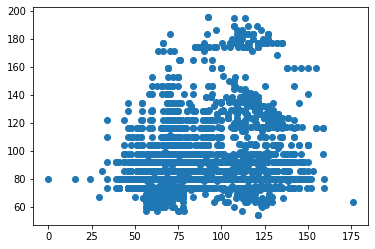

In [128]:
plt.scatter( sig["ECG HR BC"], sig["rPPG HR MV"])

## Fidelity plots

RMSE: 18.83570054750373
15.55037089289867
14.070511577916818
RMSE: 17.72155211036275 14.809995444792007


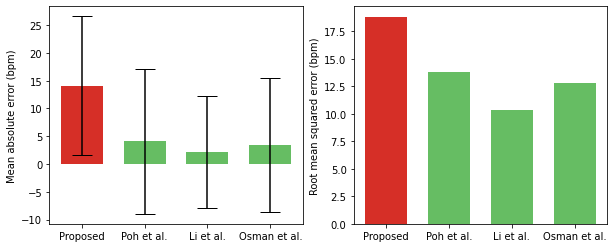

In [332]:
data = pd.read_csv("/Users/yousuf/Workspace/dissertation/code/rPPG/output/hr_evaluation/sp-fixed-bpm-trilogy-new-offset.csv")
# data = sig.loc[[s.endswith(".avi") for s in sig["Video"]]]
to_drop = ['1302', '1692', '2472', '2732', '3122', '3512']
ind = [not(any([d in s for d in to_drop])) for s in data['Video']]
data = data.loc[ind]
data["error"] = np.abs(data["rPPG HR MV"]-data["ECG HR BC"])
data["dummy error"] = np.abs(data["ECG HR BC"] - 60)# np.mean(data["ECG HR BC"]))
grouped = data.groupby('Video').agg({'error':np.mean, 'dummy error':np.mean})
m=np.mean(data["error"])
s=np.std(data["error"])
rmse = np.sqrt(np.mean(data["error"]**2))
rmse_std = np.sqrt(np.std(data["error"]**2))
print(f"RMSE: {rmse}")
means = [m,4.07,2.15,3.37]
std = [s,13.04, 10.04, 12.08]
rmses = [rmse, 13.81, 10.33, 12.79]
rmses_std = [rmse_std, 0, 0, 0]
# ticks = ["Proposed", "Poh et al. (2011)", "Li et al. (2014)", "Osman et al. (2015)"]
ticks = ["Proposed", "Poh et al.", "Li et al.", "Osman et al."]
barWidth=0.2
space =  0.1
fig, axs = plt.subplots(ncols=2, figsize=(10,4))
pos = [0, barWidth+space, (2*barWidth)+(2*space), (3*barWidth)+(3*space)]
ax = axs[0]
ax.bar(pos, means, yerr=std, capsize=10, width=barWidth, color=[cmap(0.1),cmap(0.8),cmap(0.8),cmap(0.8)])
# for i in range(len(means)):
#     ax.bar((i+1)*(barWidth+1), means[i], yerr=std[i],width=barWidth, capsize=10)
ax.set_ylabel("Mean absolute error (bpm)")
# ax.set_ylim(0,30)
ax.set_xticks(pos)
ax.set_xticklabels(ticks)
# fig, ax = plt.subplots(figsize=(6,4))
pos = [0, barWidth+space, (2*barWidth)+(2*space), (3*barWidth)+(3*space)]
ax = axs[1]
ax.bar(pos, rmses, width=barWidth, capsize=10, color=[cmap(0.1),cmap(0.8),cmap(0.8),cmap(0.8)])
# plt.xticks([r + barWidth for r in range(len(ticks))], ticks)
# print(np.mean(data["rPPG ICA Error"]))
# np.mean(data["rPPG ICA MV Error"])
# np.mean(sig["rPPG BC Error"])
ax.set_xticks(pos)
ax.set_xticklabels(ticks)
ax.set_ylabel("Root mean squared error (bpm)")
de = grouped["dummy error"]
e = grouped["error"]
# plt.savefig(eval_path+"mahnob.pgf")
print(np.mean(grouped["dummy error"]))
print(np.mean(grouped["error"]))
print(f"RMSE: {np.sqrt(np.mean(de**2))} {np.sqrt(np.mean(e**2))}")

(400, 50)
Stationary,1,24.3271,31.101,8.1443,13.1871,-5.856606752563713,4.737630025551677e-07,-3.8487943437212175,0.00039674037917674873
Stationary,1.5,12.1434,13.3007,7.981,9.3286,-4.2035529035912855,5.0179942487862475e-05,-3.590298263373557,0.0005041887838450755
Stationary,2,25.0661,40.1543,15.734,34.8932,-0.9184854203634378,0.36833785719705747,-0.3243799948137136,0.7487755678377848
Jogging,1,46.5215,47.796,42.7873,49.0403,6.2847738598317155,9.112444979825687e-09,7.703153646483904,2.009509179563681e-11
Jogging,1.5,35.5262,37.394,55.4532,60.6769,10.908893185779776,4.31552107929026e-19,10.643509318237212,1.8475256744506762e-17
Jogging,2,32.9423,36.6214,35.5231,45.2086,3.856644266883997,0.0007285536652695078,4.690923816563366,0.00012178782751289731
Star jumps,1,43.3262,46.2494,26.7984,29.2383,-6.624446332975771,1.2607674171439088e-09,-7.469471004145589,3.423743911827107e-11
Star jumps,1.5,51.2919,52.2412,19.1177,25.1191,-14.52533378845269,6.3123135457122435e-27,-12.658475849741539,4.382

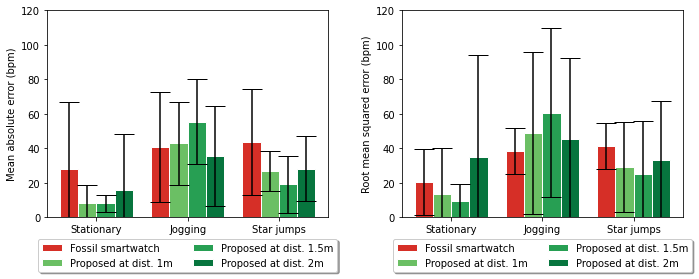

In [383]:
from scipy.stats import ttest_ind
ind = ~np.isnan(sig["PPG HR FFT"])
data = sig.loc[ind]
data = data.loc[sig["Region selector"] == "BayesianSkinDetector-weighted"]
print(data.shape)
sig["rPPG ICA Error"] = np.abs(sig["ECG HR BC"] - sig["rPPG HR ICA"])
sig["rPPG ICA MV Error"] = np.abs(sig["ECG HR BC"]-sig["rPPG HR MV"])
sig["rPPG ICA MV Error Perc"] = sig['rPPG ICA MV Error']/sig["ECG HR BC"]
sig["rPPG ICA Error Perc"] = sig["rPPG ICA Error"]/sig["ECG HR BC"] 
sig["PPG Error"] = np.abs(sig["ECG HR BC"]-sig["PPG HR FFT"])
sig["PPG Error Perc"] = sig["PPG Error"]/sig["ECG HR BC"]
sig["G Error"]  = np.abs(sig["ECG HR BC"] - sig["G HR"])
sig["rPPG PCA Error"]  = np.abs(sig["ECG HR BC"] - sig["rPPG HR PCA"])
sig["PPG BC Error"] = np.abs(sig["ECG HR BC"]-sig["PPG HR BC"])
sig["rPPG BC Error"] = np.abs(sig["ECG HR BC"]-sig["ICA 1 BC"])
data = data.loc[[s.endswith(".mp4") for s in data["Video"]]]
data["Type"] = ["Stationary" if "stat" in s else "Jogging" if "jog" in s else "Star jumps" for s in data["Video"]]
data["Distance"] = [1 if "1_" in s else 1.5 if "1.5" in s else 2 for s in data["Video"]]

# data = data.groupby("Type").agg()
for s in status:
    for d in distances:
        rel = data.loc[(data["Type"] == s) & (data["Distance"]==d)]
        ppg_err,rppg_err = rel["PPG Error"], rel["rPPG ICA MV Error"]
#         print(f"Status: {s}, mean : {np.mean(rel['rPPG ICA MV Error'])}, {np.mean(rel['PPG Error'])}")
#         print(pearsonr(rel["rPPG HR MV"], rel["ECG HR BC"]))
#         print(pearsonr(rel["PPG HR FFT"], rel["ECG HR BC"]))
#         print(f"ttest for {s} at distance {d}")
#         print(f"Means: {np.mean(rel['rPPG ICA Error'])} {np.mean(rel['PPG Error'])}")
        t1, p1 = ttest_ind(rel["rPPG ICA Error"], rel["PPG Error"], equal_var=False, nan_policy='omit')
        t2, p2 = ttest_ind(rel["rPPG ICA Error"]**2, rel["PPG Error"]**2, equal_var=False, nan_policy='omit')
        dp = 4
        print(f"{s},{round(d,dp)},{round(np.mean(ppg_err),dp)},{round(np.sqrt(np.mean(ppg_err**2)),dp)},{round(np.mean(rppg_err),dp)},{round(np.sqrt(np.mean(rppg_err**2)),dp)},{t1},{p1},{t2},{p2}")
        
    
status = ["Stationary", "Jogging", "Star jumps"]
# thresholds = [0.1, 0.125, 0.15, 0.175, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
distances = [1,1.5,2]
ylabels = ["Mean absolute error (bpm)", "Root mean squared error (bpm)"]
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
 
# set width of bar
barWidth = 0.2

temp = data.groupby(['Type', 'Distance']).agg({"rPPG ICA MV Error":[np.mean,np.std, lambda x: np.sqrt(np.mean(x**2)), lambda x: np.sqrt(np.std(x**2)), len], "rPPG ICA MV Error Perc":[np.mean,np.std], 
                                               "rPPG ICA Error":[np.mean,np.std], "rPPG ICA Error Perc":[np.mean,np.std], "PPG Error":[np.mean, np.std, lambda x: np.sqrt(np.mean(x**2)), lambda x: np.sqrt(np.std(x**2))], "PPG Error Perc":[np.mean, np.std]})
temp.columns = ["MV mean", "MV std", "MV rmse mean", "MV rmse std", "Number of values", "MV perc mean", "MV perc std", "ICA mean", "ICA std", "ICA perc", "ICA perc std", "PPG mean", "PPG std", "PPG rmse mean", "PPG rmse std", "PPG perc", "PPG perc std"]
# set height of bar
# an array of the heights for each threshold, first element is face detector
# bar_heights = 
# bars1 = 
# bars2 = [28, 6, 16, 5, 10]
# bars3 = [29, 3, 24, 25, 17]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
for index,err in enumerate(["MV", "MV rmse"]):
    ax = axs[index]
    bar_heights = []
    bar_errors = []

    det_h = []
    det_err = []
    for s in status:
        relevant = temp.loc[s]
        if index == 1: 
            det_mean, det_std = np.mean(relevant["PPG mean"]), np.mean(relevant["PPG std"])
        else:
            det_mean, det_std = np.mean(relevant["PPG rmse mean"]), np.mean(relevant["PPG rmse std"])
        det_h.append(det_mean)
        det_err.append(det_std)

    bar_heights.append(det_h)
    bar_errors.append(det_err)

#     display(temp)
    for d in distances: 
        group_heights = []
        group_errors = []
        for s in status:
            rel = temp.loc[s,d]
            group_heights.append(rel[err + " mean"])
    #         group_heights.append(rel["MV mean"])
            group_errors.append(rel[err +  " std"])
    #         group_errors.append(rel["MV std"])
            print(f"{s} {d}, mv error: {rel['MV mean']} non-mv error {rel['ICA mean']}")
        bar_heights.append(group_heights)
        bar_errors.append(group_errors)

    cmap = cm.get_cmap('RdYlGn')
    # r1 = np.arange(len(bars1))
    # r2 = [x + barWidth for x in r1]
    # r3 = [x + barWidth for x in r2]
    for i, group in enumerate(bar_heights):
        r = np.arange(len(group))
        r = [x + (i*barWidth) for x in r]
    #     c = "r" if i == 0 else "b"
        c = cmap(0.1) if i == 0 else cmap(0.7 + (0.09*i))
        l = "Fossil smartwatch" if i == 0 else f"Proposed at dist. {distances[i-1]}m"
        ax.bar(r, group, yerr=bar_errors[i], width=barWidth, color=c, label=l, edgecolor='white', capsize=10)

    # Make the plot
    # plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
    # plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
    # plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')

    # Add xticks on the middle of the group bars
    # ax.xlabel('group', fontweight='bold')
    ax.set_xticks([r + (1.5*barWidth) for r in range(len(status))])
    ax.set_xticklabels(status)
    ax.set_ylabel(ylabels[index])
    ax.set_ylim(0,120)
#     print(bar_heights)

    # Create legend & Show graphic
    # ax.legend()
    # Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08),
              fancybox=True, shadow=True, ncol=2)
    # tikzplotlib.save(eval_path+"tracking_time.tex")
plt.tight_layout()
plt.savefig(eval_path+"fidelity.pgf")
plt.show()

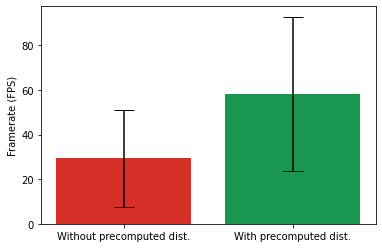

In [379]:
orig = pd.read_csv("/Users/yousuf/Workspace/dissertation/code/rPPG/output/hr_evaluation/ppg_meta.csv")
prec = pd.read_csv("/Users/yousuf/Workspace/dissertation/code/rPPG/output/hr_evaluation/ppg_meta_2.csv")
orig["FPS"] = orig["Number of frames"]/orig["Total time"]
prec["FPS"] = prec["Number of frames"]/prec["Total time"]
ind_o = ["BayesianSkinDetector" in s for s in orig["Region selector"]]
ind_p = ["BayesianSkinDetector" in s for s in prec["Region selector"]]
o_f, p_f = orig.loc[ind_o]["FPS"], prec.loc[ind_p]["FPS"]
fig, ax = plt.subplots(figsize=(6,4))
locs = np.arange(2)
barwidth=0.8
ax.bar(locs, [np.mean(o_f), np.mean(p_f)], yerr=[np.std(o_f), np.std(p_f)], color=[cmap(0.1), cmap(0.9)], capsize=10, width=barwidth)
ax.set_xticks(locs)
ax.set_xticklabels(["Without precomputed dist.", "With precomputed dist."])
ax.set_ylabel("Framerate (FPS)")
plt.savefig(eval_path+"precomputed.pgf")

Ttest_indResult(statistic=1.580232384829079, pvalue=0.11406371050497345)
s:stat, 9.007295980104491, 9.309074350800545, 7.959304491063706, 9.391185685703691, 2.1719053231911225, 0.03001882837464558
s:jog, 65.55103378680548, 15.145611110928268, 64.12845137481874, 16.655307215616467, 1.7317448378192628, 0.08352432158983931
s:star, 20.035402987364296, 15.31449206086121, 19.75222450759673, 14.98897534976745, 0.3659784776985783, 0.7144315988205205


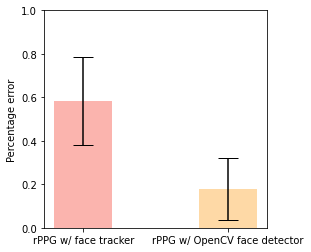

In [185]:
sp_exp = pd.read_csv(PATH + "sp-fixed-bpm-2.csv")
sp_exp = sp_exp[sp_exp["ECG HR BC"]!=0]
sp_exp["rPPG ICA Error"] = np.abs(sp_exp["ECG HR BC"] - sp_exp["rPPG HR ICA"])
# sp_exp["rPPG ICA MV Error"] = np.abs(sp_exp["ECG HR BC"]-sp_exp["rPPG HR MV"])
sp_exp["rPPG ICA Error Perc"] = sp_exp["rPPG ICA Error"]/sp_exp["ECG HR BC"] 
sp_exp["PPG Error"] = np.abs(sp_exp["ECG HR BC"]-sp_exp["PPG HR FFT"])
sp_exp["G Error"]  = np.abs(sp_exp["ECG HR BC"] - sp_exp["G HR"])
sp_exp["Type"] = ["Stationary" if "stat" in s or s.endswith(".avi") else "Jogging" if "jog" in s else "Star jumps" for s in sp_exp["Video"]]
sp_exp["rPPG PCA Error"]  = np.abs(sp_exp["ECG HR BC"] - sp_exp["rPPG HR PCA"])
sp_exp["PPG BC Error"] = np.abs(sp_exp["ECG HR BC"]-sp_exp["PPG HR BC"])
tracker_err = sp_exp.groupby(by=["Tracker", "Type"]).agg({"rPPG ICA Error Perc":[np.mean,np.std]})
fig,ax = plt.subplots(figsize=(4,4))
col = "rPPG ICA Error Perc"
locations = [0,0.5]
barwidth=0.2
bars = cm.get_cmap("Pastel1")
for i in range(2):
    rel = tracker_err.iloc[i][col]
    ax.bar([locations[i]], rel["mean"], yerr=rel["std"], capsize=10, width=barwidth, color=bars(i/2))
ax.set_ylim(0,1)
ax.set_ylabel("Percentage error")
x,y = sp_exp.loc[sp_exp["Tracker"]=="RepeatedDetector-DNNDetector"]["rPPG ICA Error"], sp_exp.loc[sp_exp["Tracker"]=="KLTBoxingWithThresholding-DNNDetector"]["rPPG ICA Error"]
print(ttest_ind(x,y,equal_var=True))
for s in ["stat","jog","star"]:
    ind = [[s in x for x in sp_exp["Video"]] & (sp_exp["Tracker"]==d) for d in ["RepeatedDetector-DNNDetector", "KLTBoxingWithThresholding-DNNDetector"]]
    errors = [sp_exp.loc[i]['rPPG ICA Error'] for i in ind]
    st,p = ttest_ind(errors[0], errors[1], nan_policy='omit', equal_var=True)
    print(f"s:{s}, {np.mean(errors[0])}, {np.std(errors[0])}, {np.mean(errors[1])}, {np.std(errors[1])}, {st}, {p}")
plt.xticks(locations,['rPPG w/ face tracker', 'rPPG w/ OpenCV face detector'])
plt.savefig(eval_path + "tracker_err.pgf")

In [111]:
tracker_err

rPPG ICA Error Perc          
                                                     mean       std
Tracker                                                            
KLTBoxingWithThresholding-DNNDetector            0.272900  0.243067
RepeatedDetector-DNNDetector                     0.279491  0.249211

In [24]:
grouped = sig.groupby(by=["Video", "Tracker", "Region selector"]).apply(np.mean)

In [26]:
pd.set_option('display.max_rows', 432)
pd.set_option('display.max_columns', 200)
display(grouped[["PPG Error", "PPG BC Error", "rPPG ICA Error", "G Error", "rPPG PCA Error"]])
print(np.mean(grouped["PPG Error"]))
print(np.mean(grouped["rPPG ICA Error"]))

PPG Error  \
Video                                              Tracker                               Region selector                               
/Users/yousuf/Workspace/dissertation/code/rPPG/... KLTBoxingWithThresholding-DNNDetector BayesianSkinDetector-thresholded  31.577321   
                                                                                         BayesianSkinDetector-weighted     31.577321   
                                                                                         IntervalSkinDetector              31.577321   
                                                                                         PrimitiveROI                      31.577321   
                                                   RepeatedDetector-DNNDetector          BayesianSkinDetector-thresholded  31.577321   
                                                                                         BayesianSkinDetector-weighted     31.577321   
                                                                                         IntervalSkinDetector              31.577321   
                                                                                         PrimitiveROI                      31.577321   
/Users/yousuf/Workspace/dissertation/code/rPPG/... KLTBoxingWithThresholding-DNNDetector BayesianSkinDetector-thresholded  32.967984   
                                                                                         BayesianSkinDetector-weighted     32.967984   
                                                                                         IntervalSkinDetector              32.967984   
                                                                                         PrimitiveROI                      32.967984   
                                                   RepeatedDetector-DNNDetector          BayesianSkinDetector-thresholded  32.967984   
                                                                                         BayesianSkinDetector-weighted     32.967984   
                                                                                         IntervalSkinDetector              32.967984   
                                                                                         PrimitiveROI                      32.967984   
/Users/yousuf/Workspace/dissertation/code/rPPG/... KLTBoxingWithThresholding-DNNDetector BayesianSkinDetector-thresholded  42.033439   
                                                                                         BayesianSkinDetector-weighted     42.033439   
                                                                                         IntervalSkinDetector              42.033439   
                                                                                         PrimitiveROI                      42.033439   
                                                   RepeatedDetector-DNNDetector          BayesianSkinDetector-thresholded  42.033439   
                                                                                         BayesianSkinDetector-weighted     42.033439   
                                                                                         IntervalSkinDetector              42.033439   
                                                                                         PrimitiveROI                      42.033439   
/Users/yousuf/Workspace/dissertation/code/rPPG/... KLTBoxingWithThresholding-DNNDetector BayesianSkinDetector-thresholded  46.789022   
                                                                                         BayesianSkinDetector-weighted     46.789022   
                                                                                         IntervalSkinDetector              46.789022   
                                                                                         PrimitiveROI                      46.789022   
                                           

33.327473344036825
26.800297695800847


In [148]:
rs = sig.groupby(by=["Region selector"]).agg({"rPPG ICA Error":np.mean})
rs

,rPPG ICA Error
Region selector,
BayesianSkinDetector-thresholded,22.787945
BayesianSkinDetector-weighted,22.526048
IntervalSkinDetector,22.672902
PrimitiveROI,22.763014


,Video,Tracker,Region selector,Window size,Offset size,Heart Rate Number,rPPG HR ICA,rPPG HR PCA,PPG HR BC,PPG HR FFT,ECG HR BC,ECG HR FFT,ICA 1 HR,ICA 1 Power,ICA 1 BC,ICA 2 HR,ICA 2 Power,ICA 2 BC,ICA 3 HR,ICA 3 Power,ICA 3 BC,PCA 1 HR,PCA 1 Power,PCA 1 BC,PCA 2 HR,PCA 2 Power,PCA 2 BC,PCA 3 HR,PCA 3 Power,PCA 3 BC,R HR,R Power,R BC,G HR,G Power,G BC,B HR,B Power,B BC,rPPG ICA Error,PPG Error,G Error,rPPG PCA Error
13,/Users/yousuf/Workspace/dissertation/code/rPPG...,RepeatedDetector-DNNDetector,PrimitiveROI,600,60,13,66.0,60.0,NaN,95.599349,54.463904,121.742845,63.0,10920.513594,103.349282,66.0,13832.163883,109.756098,66.0,14265.868433,106.849315,60.0,11756.499235,114.285714,69.0,8491.353155,113.207547,66.0,19676.905348,93.750000,69.0,7653.921415,108.127208,63.0,13870.776752,97.297297,60.0,13223.020144,115.932203,11.536096,41.135444,8.536096,5.536096
14,/Users/yousuf/Workspace/dissertation/code/rPPG...,RepeatedDetector-DNNDetector,PrimitiveROI,600,60,14,66.0,60.0,NaN,91.367120,57.667663,121.742845,63.0,11894.356598,117.073171,66.0,12878.470947,111.724138,96.0,6873.236652,121.008403,60.0,13304.575700,118.032787,78.0,7011.722870,118.918919,66.0,18697.543202,115.789474,96.0,6925.114515,110.322581,66.0,15118.921278,94.240838,57.0,13777.943654,118.942731,8.332337,33.699457,8.332337,2.332337
15,/Users/yousuf/Workspace/dissertation/code/rPPG...,RepeatedDetector-DNNDetector,PrimitiveROI,600,60,15,63.0,60.0,107.995680,151.422886,57.673822,121.755847,57.0,9451.413855,120.382166,63.0,8406.895877,116.349810,63.0,21376.514860,105.882353,60.0,12962.339970,106.578947,57.0,8721.504710,120.948617,63.0,17928.578389,107.284768,57.0,9214.022763,114.487633,63.0,17053.996679,104.761905,60.0,10803.267989,121.621622,5.326178,93.749063,5.326178,2.326178
16,/Users/yousuf/Workspace/dissertation/code/rPPG...,RepeatedDetector-DNNDetector,PrimitiveROI,600,60,16,66.0,60.0,84.564019,51.152941,57.667663,124.946604,60.0,9213.729664,110.580205,66.0,15761.328991,115.714286,63.0,12398.249705,118.309859,60.0,11685.760699,106.508876,63.0,8685.061457,116.546763,63.0,17831.017189,118.421053,63.0,9717.158350,117.525773,63.0,16134.564158,106.719368,57.0,9555.626713,130.645161,8.332337,6.514722,5.332337,2.332337
17,/Users/yousuf/Workspace/dissertation/code/rPPG...,RepeatedDetector-DNNDetector,PrimitiveROI,600,60,17,66.0,60.0,92.292453,56.508303,57.673822,124.959949,57.0,8744.748663,125.274725,66.0,15701.279267,93.333333,63.0,8616.794511,107.547170,60.0,9756.538442,111.917098,57.0,8121.821602,121.153846,66.0,15301.113738,110.900474,60.0,9438.524056,122.264151,63.0,13517.873047,102.127660,57.0,8460.084369,134.801762,8.326178,1.165519,5.326178,2.326178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4524,/Users/yousuf/Workspace/dissertation/code/rPPG...,KLTBoxingWithThresholding-DNNDetector,BayesianSkinDetector-weighted,600,60,0,176.9,176.9,NaN,50.246488,91.095829,115.209431,92.8,12939.290478,119.541985,176.9,20128.977878,165.898004,95.7,12566.161873,137.750000,176.9,9611.912331,134.473068,176.9,12859.120673,133.846154,92.8,11573.886612,124.628099,176.9,14995.894358,150.742574,176.9,8827.822889,135.527638,84.1,7261.341356,128.724490,85.804171,40.849342,85.804171,85.804171
4525,/Users/yousuf/Workspace/dissertation/code/rPPG...,KLTBoxingWithThresholding-DNNDetector,BayesianSkinDetector-weighted,600,60,1,176.9,176.9,NaN,117.684851,91.087694,115.199143,92.8,11017.708203,145.783784,95.7,13529.026137,128.681672,176.9,18036.179568,151.092437,176.9,9424.787228,143.705357,176.9,14650.133079,153.634497,92.8,10853.260421,117.772926,176.9,14978.923608,148.251121,176.9,8632.871853,143.136247,63.8,6348.690982,136.556962,85.812306,26.597157,85.812306,85.812306
4526,/Users/yousuf/Workspace/dissertation/code/rPPG...,KLTBoxingWithThresholding-DNNDetector,BayesianSkinDetector-weighted,600,60,2,176.9,176.9,NaN,74.024091,101.803894,117.878193,92.8,10525.601473,134.

35.42582978944598
30.90197892572636


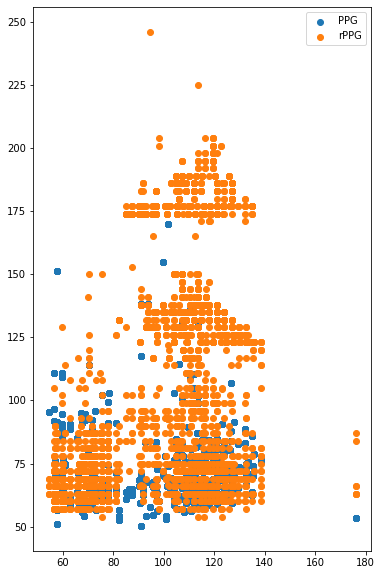

In [167]:
ind = ~np.isnan(sig["PPG HR FFT"])
rel = sig.loc[ind]
fig, ax = plt.subplots(figsize=(20,10))
display(rel)
ax.scatter(rel["ECG HR BC"], rel["PPG HR FFT"], label="PPG")
ax.scatter(rel["ECG HR BC"], rel["ICA 1 HR"], label="rPPG")
ax.legend()
ax.set_aspect('equal')
print(np.mean(np.abs(sig.loc[ind]["ECG HR BC"] - sig.loc[ind]["PPG HR FFT"])))
print(np.mean(np.abs(sig.loc[ind]["ECG HR BC"] - sig.loc[ind]["ICA 1 HR"])))

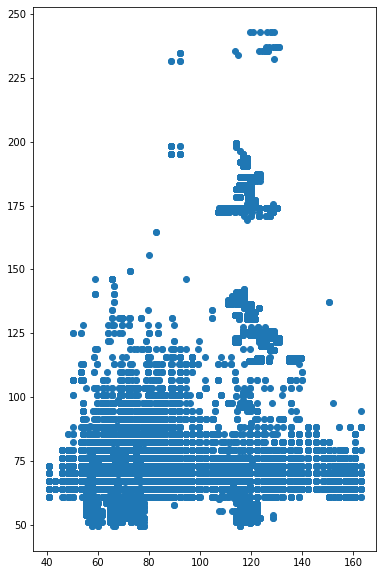

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_aspect('equal')
ax.scatter(sig["ECG HR"], sig["rPPG HR PCA"])

In [29]:
sig

,Video,Tracker,Region selector,Window size,Offset size,Heart Rate Number,rPPG HR ICA,rPPG HR PCA,PPG HR,ECG HR,...,ICA 3 HR,ICA 3 Power,PCA 1 HR,PCA 1 Power,PCA 2 HR,PCA 2 Power,PCA 3 HR,PCA 3 Power,MAE ICA,MAE PCA
0,/home/yousuf/workspace/dissertation/code/rPPG/...,RepeatedDetector-DNNDetector,PrimitiveROI,1200,60,0,54.00,54.00,NaN,57.924377,...,54.00,3786.258200,54.00,3749.938138,52.50,1411.690538,72.00,828.598548,3.924377,3.924377
1,/home/yousuf/workspace/dissertation/code/rPPG/...,RepeatedDetector-DNNDetector,PrimitiveROI,1200,60,1,52.50,73.50,NaN,57.924377,...,73.50,1583.034428,73.50,1454.176068,52.50,1566.143280,72.00,866.941348,5.424377,15.575623
2,/home/yousuf/workspace/dissertation/code/rPPG/...,RepeatedDetector-DNNDetector,PrimitiveROI,1200,60,2,52.50,73.50,NaN,57.924377,...,63.00,884.715876,73.50,1464.963741,52.50,1820.227705,61.50,1091.189728,5.424377,15.575623
3,/home/yousuf/workspace/dissertation/code/rPPG/...,RepeatedDetector-DNNDetector,PrimitiveROI,1200,60,3,75.00,75.00,NaN,57.921270,...,75.00,2054.516305,75.00,1435.623173,52.50,1956.319026,51.00,1116.657800,17.078730,17.078730
4,/home/yousuf/workspace/dissertation/code/rPPG/...,RepeatedDetector-DNNDetector,PrimitiveROI,1200,60,4,51.00,51.00,NaN,56.315366,...,51.00,1992.622496,51.00,1502.697231,52.50,2243.212985,72.00,1192.114234,5.315366,5.315366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40755,/home/yousuf/workspace/dissertation/code/rPPG/...,KLTBoxingWithThresholding-DNNDetector,BayesianSkinDetector,1200,60,194,67.10,64.05,NaN,104.625365,...,76.25,3566.642074,64.05,5074.614075,70.15,2587.369241,76.25,4114.158207,37.525365,40.575365
40756,/home/yousuf/workspace/dissertation/code/rPPG/...,KLTBoxingWithThresholding-DNNDetector,BayesianSkinDetector,1200,60,195,76.25,64.05,NaN,104.625365,...,67.10,3303.790348,64.05,3925.885092,64.05,2306.663953,79.30,4417.510199,28.375365,40.575365
40757,/home/yousuf/workspace/dissertation/code/rPPG/...,KLTBoxingWithThresholding-DNNDetector,BayesianSkinDetector,1200,60,196,79.30,76.25,NaN,104.625365,...,76.25,3429.121548,76.25,3639.173227,67.10,1802.851319,76.25,4737.646698,25.325365,28.375365
40758,/home/yousuf/workspace/dissertation/code/rPPG/...,KLTBoxingWithThresholding-DNNDetector,BayesianSkinDetector,1200,60,197,70.15,67.10,NaN,104.591440,...,70.15,4943.592273,67.10,3521.707822,79.30,2748.289215,70.15,6329.639095,34.441440,37.491440


In [39]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
sig["MAE ICA"] = np.abs(sig["rPPG HR ICA"]-sig["ECG HR"])
sig["MAE PCA"] = np.abs(sig["rPPG HR PCA"]-sig["ECG HR"])
# display(sig.groupby(by=["Video", "Region selector"]).agg({'MAE ICA':np.mean, 'MAE PCA':np.mean}))
display(sig.groupby(by=["Video", "Region selector"]).agg(np.mean))

Window size  \
Video                                              Region selector                     
/home/yousuf/workspace/dissertation/code/rPPG/e... BayesianSkinDetector       1200.0   
                                                   IntervalSkinDetector       1200.0   
                                                   PrimitiveROI               1200.0   
/home/yousuf/workspace/dissertation/code/rPPG/e... BayesianSkinDetector       1200.0   
                                                   IntervalSkinDetector       1200.0   
                                                   PrimitiveROI               1200.0   
/home/yousuf/workspace/dissertation/code/rPPG/e... BayesianSkinDetector       1200.0   
                                                   IntervalSkinDetector       1200.0   
                                                   PrimitiveROI               1200.0   
/home/yousuf/workspace/dissertation/code/rPPG/e... BayesianSkinDetector       1200.0   
                                                   IntervalSkinDetector       1200.0   
                                                   PrimitiveROI               1200.0   
/home/yousuf/workspace/dissertation/code/rPPG/e... BayesianSkinDetector       1200.0   
                                                   IntervalSkinDetector       1200.0   
                                                   PrimitiveROI               1200.0   
/home/yousuf/workspace/dissertation/code/rPPG/e... BayesianSkinDetector       1200.0   
                                                   IntervalSkinDetector       1200.0   
                                                   PrimitiveROI               1200.0   
/home/yousuf/workspace/dissertation/code/rPPG/e... BayesianSkinDetector       1200.0   
                                                   IntervalSkinDetector       1200.0   
                                                   PrimitiveROI               1200.0   
/home/yousuf/workspace/dissertation/code/rPPG/e... BayesianSkinDetector       1200.0   
                                                   IntervalSkinDetector       1200.0   
                                                   PrimitiveROI               1200.0   
/home/yousuf/workspace/dissertation/code/rPPG/e... BayesianSkinDetector       1200.0   
                                                   IntervalSkinDetector       1200.0   
                                                   PrimitiveROI               1200.0   
/home/yousuf/workspace/dissertation/code/rPPG/e... BayesianSkinDetector       1200.0   
                                                   IntervalSkinDetector       1200.0   
                                                   PrimitiveROI               1200.0   
/home/yousuf/workspace/dissertation/code/rPPG/e... BayesianSkinDetector       1200.0   
                                                   IntervalSkinDetector       1200.0   
                                                   PrimitiveROI               1200.0   
/home/yousuf/workspace/dissertation/code/rPPG/e... BayesianSkinDetector       1200.0   
                                                   IntervalSkinDetector       1200.0   
                                                   PrimitiveROI               1200.0   
/home/yousuf/workspace/dissertation/code/rPPG/e... BayesianSkinDetector       1200.0   
                                                   IntervalSkinDetector       1200.0   
                                                   PrimitiveROI               1200.0   
/home/yousuf/workspace/dissertation/code/rPPG/e... BayesianSkinDetector       1200.0   
                                                   IntervalSkinDetector       1200.0   
                                                   PrimitiveROI               1200.0   
/home/yousuf/workspace/dissertation/code/rPPG/e... BayesianSkinDetector       1200.0   
                                                   IntervalSkinDetector       1200.0   
                         

# Heart rate isolation

# Overall

## Misc

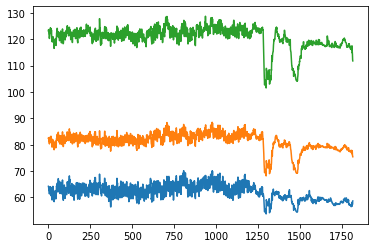

In [97]:
data = np.loadtxt("/Users/yousuf/Workspace/dissertation/code/rPPG/output/hr_evaluation/1.5_jog_1-RepeatedDetector-DNNDetector-PrimitiveROI-fixed.csv")
data = hp.filter_signal(data, [0.7, 3.5], sample_rate=framerate, 
                order=3, filtertype='bandpass')
# sos = scipy.signal.butter(3, 0.2, output='sos')
# data = scipy.signal.sosfilt(sos, data)
if not(np.std(data) == 0):
    data = (data-np.mean(data))/np.std(data)
transform = np.fft.rfft(data)
freqs = np.fft.rfftfreq(len(data), 1.0/framerate)   
freqs = 60*freqs
band_pass = np.where((freqs < 40) | (freqs > 240) )[0]
transform[band_pass] = 0
transform = np.abs(transform)**2
sos = scipy.signal.butter(3, 0.2, output='sos')
transform = scipy.signal.sosfilt(sos, transform)
powers = np.argsort(-1*transform)
hr, power = self._respiration_rejection([freqs[powers[0]], freqs[powers[1]]],[transform[powers[0]], transform[powers[1]]])
plt.plot(ppg)

In [38]:
mov_3 = pd.read_csv(f"rPPG/output/mov_3_tweaked_scaling.csv")
mov_3["recall"] = mov_3["TP"]/(mov_3["TP"]+mov_3["FN"])
mov_3["precision"] = mov_3["TP"]/(mov_3["TP"]+mov_3["FP"])

In [39]:
mov_3

,Unnamed: 0,Video,Threshold,Frame number,Time of face tracker,Time of face detector,FN,FP,TN,TP,Time to select points,Time to track points,Point distance mean,Point distance std.,recall,precision
0,0,test-face-detection-videos/mov-3.mp4,0.4,1,0.074372,0.079875,0,0,5364672,856128,0.003070,NaN,NaN,NaN,1.000000,1.000000
1,1,test-face-detection-videos/mov-3.mp4,0.4,2,0.014469,0.063584,29106,10584,5363496,817614,NaN,0.000891,441.449463,213.158936,0.965625,0.987220
2,2,test-face-detection-videos/mov-3.mp4,0.4,3,0.013520,0.054338,9261,26523,5360787,824229,NaN,0.000677,442.368164,213.149170,0.988889,0.968824
3,3,test-face-detection-videos/mov-3.mp4,0.4,4,0.016622,0.056030,21834,31095,5352246,815625,NaN,0.000924,445.580292,216.458817,0.973928,0.963276
4,4,test-face-detection-videos/mov-3.mp4,0.4,5,0.015718,0.054355,39471,20655,5334609,826065,NaN,0.000628,446.913879,218.664017,0.954397,0.975606
5,5,test-face-detection-videos/mov-3.mp4,0.4,6,0.013558,0.053673,24444,20475,5362866,813015,NaN,0.000628,444.223358,216.116074,0.970812,0.975435
6,6,test-face-detection-videos/mov-3.mp4,0.4,7,0.013670,0.054632,9408,9408,5370048,831936,NaN,0.000619,441.814484,213.589447,0.988818,0.988818
7,7,test-face-detection-videos/mov-3.mp4,0.4,8,0.016398,0.053679,5292,22554,5364756,828198,NaN,0.000742,442.671783,213.126312,0.993651,0.973489
8,8,test-face-detection-videos/mov-3.mp4,0.4,9,0.015354,0.053224,0,9408,5364672,846720,NaN,0.000592,445.144867,215.690247,1.000000,0.989011
9,9,test-face-detection-videos/mov-3.mp4,0.4,10,0.015111,0.057133,10584,27993,5350056,832167,NaN,0.000640,447.190857,217.194229,0.987441,0.967456


In [1]:

import pyedflib
import numpy as np
import os

f = pyedflib.EdfReader(file_name)
n = f.signals_in_file
signal_labels = f.getSignalLabels()
print(signal_labels)
ecg = signal_labels.index("ECG")
plt.plot(f.readSignal(ecg))
f._close()
# sigbufs = np.zeros( f.getNSamples()[0]))
# print(f.readSignal(0))

NameError: name 'file_name' is not defined

In [2]:
f = pyedflib.EdfReader(f"rPPG/mahnob/Part_1_S_Trial2_emotion.bdf")
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sampling_freq = f.getSampleFrequency(ecg)
sigbufs = np.zeros((n, f.getNSamples()[0]))
ecg = f.readSignal(ecg)

NameError: name 'ecg' is not defined

In [3]:
from biosppy import storage
from biosppy.signals import ecg as ECG
import pyedflib
import numpy as np
def heart_rates_edf(file_name):
    f = pyedflib.EdfReader(file_name)
    signal_labels = f.getSignalLabels()
    ecg = signal_labels.index("ECG")
    sampling_freq = f.getSampleFrequency(ecg)
    fig, ax = plt.subplots(figsize=(20,10))
    ecg = f.readSignal(ecg)[15000:80000]
#     ecg = ecg[:len(ecg)-10000]
    ecg = (ecg-np.mean(ecg))/np.std(ecg)
    ax.plot(ecg)
    print(f"Sampling freq: {sampling_freq}")
    f._close()
    print(f"Number of ecg points: {len(ecg)} which is {len(ecg)/sampling_freq}s")
    time_axis, filtered, rpeaks, template_time_axis, templates, heart_rate_time_axis, heart_rate = ECG.ecg(signal=ecg, sampling_rate=sampling_freq*1.0, show=False)
    print(f"Number of peaks: {len(rpeaks)}")
    avg_hr = 60*len(rpeaks)*sampling_freq/len(ecg)
    print(f"Heart rate from rpeaks: {avg_hr}")
    return avg_hr

/home/yousuf/.local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [28]:
np.isnan(my_data)

,Timestamp,PPG,Time
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [30]:
my_data[(my_data["Time"] < 100) & (my_data["Time"] > 10)]

,Timestamp,PPG,Time
105,37450547984755,1231902704,38.719111
106,37450557658818,1231909008,38.729346
107,37450567302359,1231937104,38.739549
108,37450576976422,1231914608,38.749784
109,37450586650536,1231910864,38.760020
110,37450596324599,1231909680,38.770255
111,37450605968140,1231907760,38.780458
112,37450615642203,1231906640,38.790693
113,37450625316265,1231941264,38.800929
114,37450634990380,1231915696,38.811164


In [24]:
my_data.where((my_data["Time"]< 100) & (my_data["Time"] > 10))

,Timestamp,PPG,Time
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


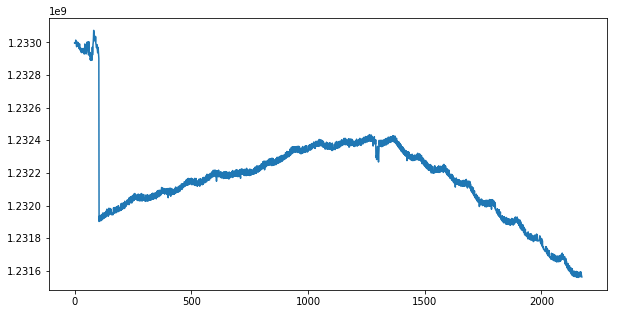

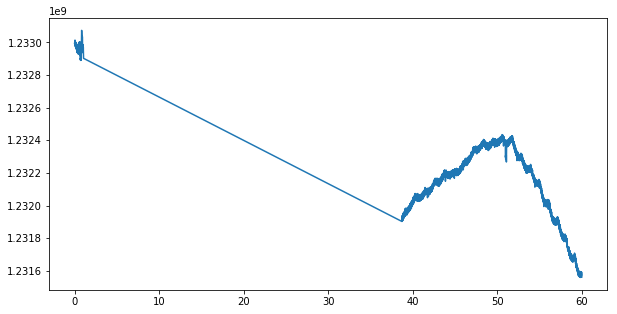

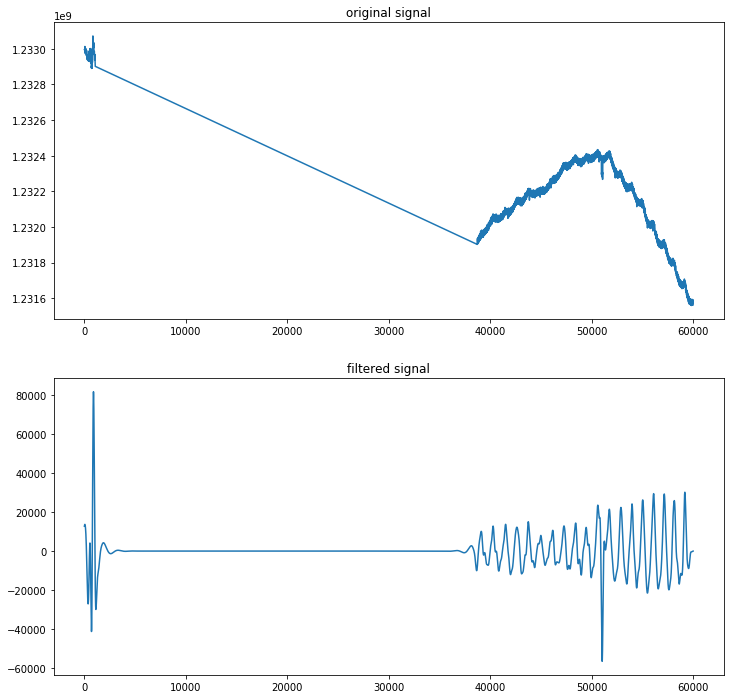

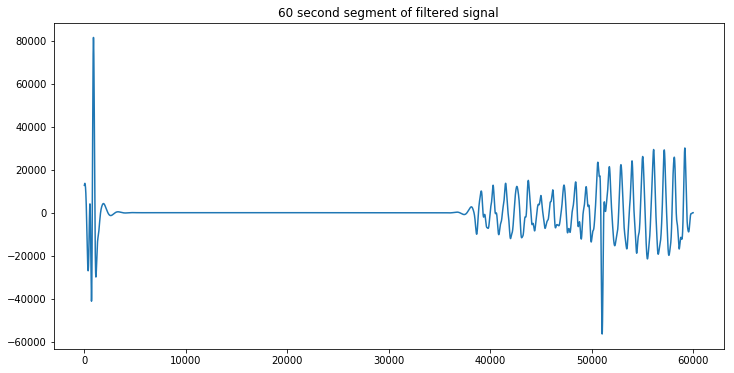

In [18]:
import heartpy as hp
from numpy import genfromtxt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import biosppy
my_data = pd.read_csv('/home/yousuf/workspace/dissertation/code/rPPG/experiments/yousuf-re-run/1_stat_1.csv')
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(my_data["PPG"])
def upsample(data):
    t_max, t_min = np.max(data["Timestamp"]),np.min(data["Timestamp"])
    data["Time"] = 60*(data["Timestamp"]-t_min)/(t_max-t_min)
    x = np.arange(0, 60, 1/1000)
    y = np.interp(x, data["Time"], data["PPG"])
    return y
upsample(my_data)
x = np.arange(0, 60, 60/60000)
y = np.interp(x, my_data["Time"], my_data["PPG"])
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(my_data["Time"], my_data["PPG"])
# ax.plot(x,y)
sample_rate=1000
signal = y
filtered = hp.filter_signal(signal, [0.7, 3.5], sample_rate=sample_rate, 
                            order=3, filtertype='bandpass')

#let's plot first 240 seconds and work with that!
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(signal[0:int(240 * sample_rate)])
plt.title('original signal')
plt.subplot(212)
plt.plot(filtered[0:int(240 * sample_rate)])
plt.title('filtered signal')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(filtered[0:int(sample_rate * 60)])
plt.title('60 second segment of filtered signal')
plt.show()
# my_data

Sampling freq: 500
Number of ecg points: 19000 which is 38.0s
Number of peaks: 36
Heart rate from rpeaks: 56.8421052631579


56.8421052631579

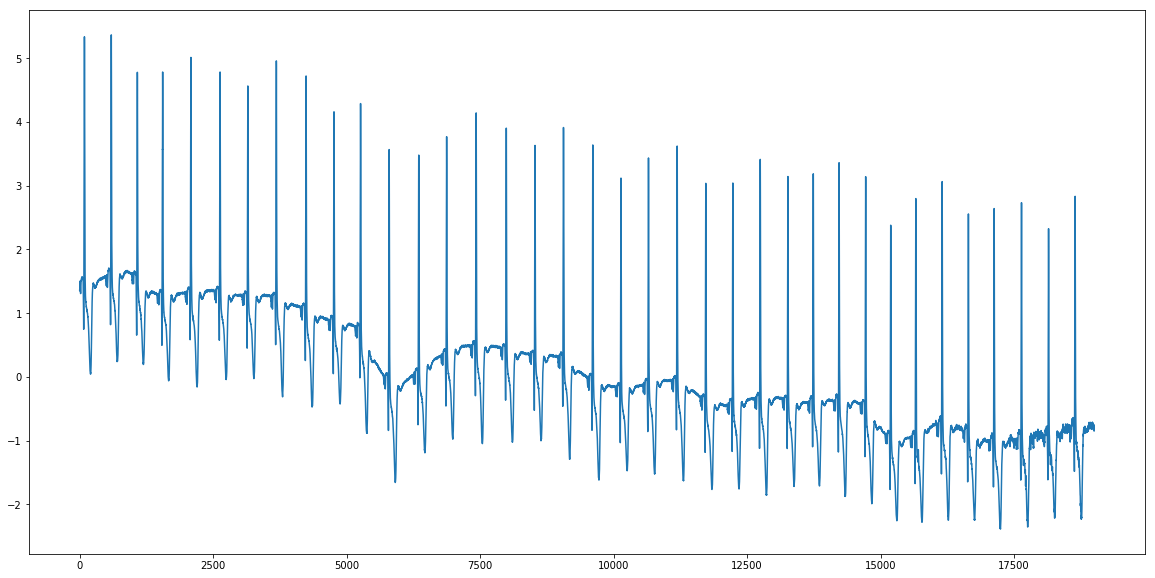

In [132]:
# file_name = "/media/yousuf/FAROS_DATA/DATA/20200104/09-08-06.EDF"
# heart_rates_bdf(file_name)
# file_name = "/media/yousuf/FAROS_DATA/DATA/20200317/16-20-08.EDF"
# heart_rates_bdf(file_name)
# file_name = "/media/yousuf/FAROS_DATA/DATA/20200317/16-22-46.EDF"
# heart_rates_bdf(file_name)
# file_name = "/media/yousuf/Titanic/19-03-2020/dissertation/code/rPPG/experiments/candidate-1/candidate-2-yousuf/16-03-07.EDF"
# file_name = "/media/yousuf/FAROS_DATA/DATA/20200320/11-18-34.EDF"
# file_name = "/media/yousuf/FAROS_DATA/DATA/20200320/14-44-18.EDF"
file_name = "/home/yousuf/workspace/dissertation/code/rPPG/experiments/yousuf-re-run/14-19-09.EDF"
# file_name = "/home/yousuf/workspace/dissertation/code/rPPG/experiments/yousuf-re-run/18-18-31.EDF"
# file_name = "/home/yousuf/workspace/dissertation/archive/15-18-03.EDF"
heart_rates_edf(file_name)

HR: (168.0, 11794838.43830053)
Sampling freq: 1000
Number of ecg points: 60000 which is 60.0s
Number of peaks: 12
Heart rate from rpeaks: 12.0


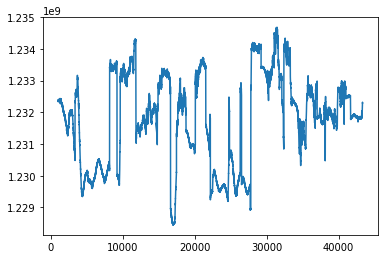

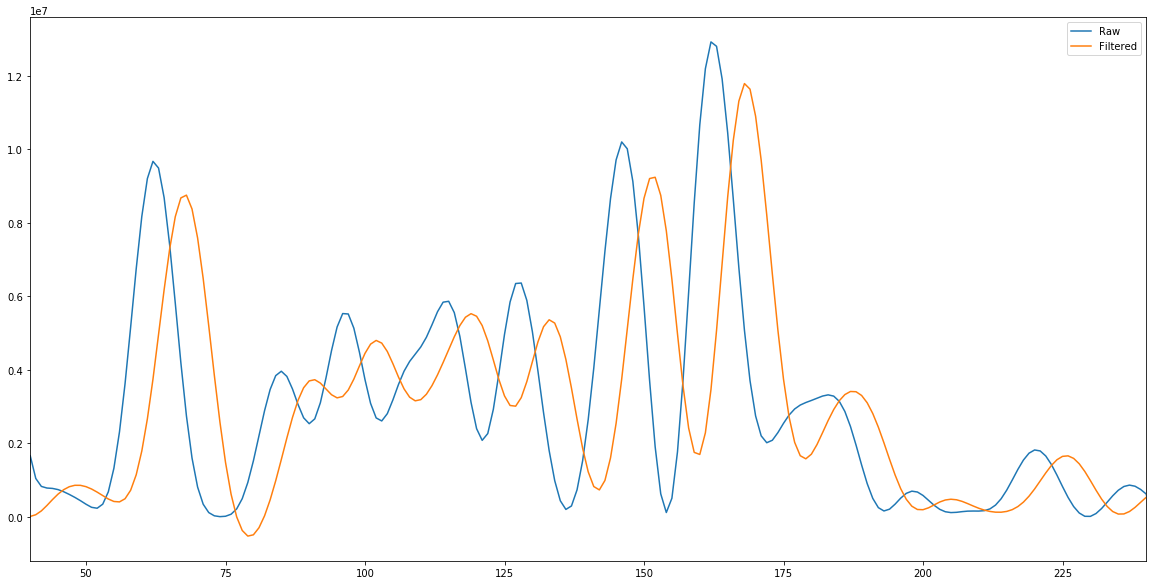

In [160]:
# my_data = my_data[1000:4000]
plt.plot(my_data["PPG"][1000:])
ecg = my_data["PPG"]
ecg = y
# ecg = f.readSignal(ecg)[15000:]
# ecg = ecg[1000:5000]
ecg = (ecg-np.mean(ecg))/np.std(ecg)
# sampling_freq = len(ecg)/50
sampling_freq=1000
print(f"HR: {Processor()._prevalent_freq(ecg, sampling_freq)}")
print(f"Sampling freq: {sampling_freq}")
# f._close()
print(f"Number of ecg points: {len(ecg)} which is {len(ecg)/sampling_freq}s")
time_axis, filtered, rpeaks, template_time_axis, templates, heart_rate_time_axis, heart_rate = ECG.ecg(signal=ecg, sampling_rate=sampling_freq*1.0, show=False)
print(f"Number of peaks: {len(rpeaks)}")
avg_hr = 60*len(rpeaks)*sampling_freq/len(ecg)
print(f"Heart rate from rpeaks: {avg_hr}")

In [125]:
from operator import itemgetter
import sklearn
from sklearn.decomposition import FastICA, PCA
import numpy as np
import scipy.signal

class Processor():
    
    def _prevalent_freq(self, data, framerate):
        """
        Return the most prevalent frequency using power spectrum
        """
        data = (data-np.mean(data))/np.std(data)
        transform = np.fft.rfft(data)
        freqs = np.fft.rfftfreq(len(data), 1.0/framerate)
        freqs = 60*freqs
        band_pass = np.where((freqs < 40) | (freqs > 240) )[0]
        transform[band_pass] = 0
        transform = np.abs(transform)**2
        sos = scipy.signal.butter(3, 0.13, output='sos')
        filtered = scipy.signal.sosfilt(sos, transform)
        fig, ax = plt.subplots(figsize=(20,10))
        ax.plot(freqs, transform, label="Raw")
        ax.plot(freqs, filtered, label="Filtered")
        ax.set_xlim(40,240)
        ax.legend()
        id = np.argmax(filtered)
        heart_rate = freqs[id]
        return heart_rate, np.max(filtered)

class ICAProcessor(Processor):

    def get_hr(self, values, framerate):
        ica = FastICA(n_components=1, max_iter=4000)
        signals = ica.fit_transform(values)
        return self._select_maximum_power_frequency([self._prevalent_freq(signals[:,i], framerate) for i in range(3)])

    def _select_maximum_power_frequency(self, rates):
        return max(rates, key=itemgetter(1))[0]


In [1]:
import numpy as np

In [21]:
x = np.array([])
x = np.append(x, np.array([1,2,3]), axis=0)
x = np.append(x, np.array([4,5,6]), axis=0)
x = np.append(x, np.array([7,8,9]), axis=0)

In [22]:
x.shape

(9,)

In [24]:
x.reshape(3,3)

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [35]:
values = np.array([[1, 2, 4],[np.nan, np.nan, np.nan], [3, 12, 8], [4, 17, 10]])
length = len(values)
xp = np.arange(length)
for i in range(3):
    nans = np.isnan(values[:,i])
    nan_indices = xp[nans]
    print(nan_indices)
    print(xp[~nans])
    print(values[~nans,i])
    values[nan_indices,i] = np.interp(nan_indices, xp[~nans], values[~nans,i]) 

[1]
[0 2 3]
[1. 3. 4.]
[1]
[0 2 3]
[ 2. 12. 17.]
[1]
[0 2 3]
[ 4.  8. 10.]


In [36]:
values

array([[ 1.,  2.,  4.],
       [ 2.,  7.,  6.],
       [ 3., 12.,  8.],
       [ 4., 17., 10.]])

In [37]:
x = []
x.append(1)
x

[1]

In [40]:
y = np.array([])
np.append(y,1)
y

array([], dtype=float64)

In [41]:
vid = "/home/test/asljflajksf.mp4"
vid.split("/")[-1][:-4]

'asljflajksf'